<a href="https://colab.research.google.com/github/CarolinaFassi/MENTORIA/blob/main/Mento_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicción de Ventas de una Cadena de Supermercados

# Trabajo Práctico N°1: Análisis y Visualización

## Introducción

En este práctico se pretende obtener una primera aproximación a los datos bajo análisis. 
En este [link](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data), se describen los contenidos de cada uno de los archivos.
La información central se encuentra en el archivo *train.csv* porque que el mismo contiene las series históricas con las ventas de cada sucursal para cada familia de productos.
Entonces, en primer lugar se cargan y presentan brevemente los datos del archivo *train.csv* y luego se proponen las consignas a seguir para la resolución del trabajo práctico. 




### Carga del dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
url = "https://www.dropbox.com/s/bbt21ors7tms6bn/train.csv?dl=1"
df = pd.read_csv(url)

In [3]:
df

id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  

[3000888 rows x 6 columns]

La variable de interés es *sales*. Si bien se podría trabajar con series desagregadas por sucursal y producto, se procede a agregar los datos a nivel de sucursales para reducir la carga computacional.

In [4]:
df.drop(['id','onpromotion'], axis = 1, inplace = True)
df  = df.groupby(by=['store_nbr','date']).sum().unstack(0)
df = df['sales']
df=df.add_prefix('Store ')

Guardado del dataset

In [5]:
file_name = 'dataset.xlsx'
df.to_excel(file_name)

Lectura

In [6]:
df = pd.read_excel('dataset.xlsx', index_col='date', parse_dates=['date'])

In [7]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1684, freq=None)

# Consignas del trabajo práctico N°1

El objetivo general del práctico es realizar una análisis exploratorio profundo de las series.
Se plantean algunas sugerencias para explorar las series en forma individual y conjunta por medio de medidas descriptivas y visualizaciones, con la finalidad de confeccionar un informe detallado sobre los datos analizados que sirva de base para, en practicos posteriores, modelar las series y hacer pronósticos.

Dado que se trata de muchas series, se puede limitar el análisis a un subconjuto de las mismas, por ejemplo seleccionando las 5-10 sucursales con más ventas. 

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como __series de tiempo__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. El siguiente [tutorial](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/) puede ser de gran ayuda para introducirse en la confección de algunos gráficos para series de tiempo y funcionalidades básicas de pandas para dicho tipo de datos.

Se proponen las siguientes actividades motivadoras:


- Determinar el tipo de variables y el período de tiempo bajo análisis.

- Explorar si hay valores faltantes.

- Indagar sobre la existencia de ceros. ¿Hay valores nulos? ¿Son muchos? ¿En qué días ocurren? 

- Analizar las distribuciones por medio de gráficos(por ejemplo: histogramas y boxplots) y medidas de estadística descriptiva (por ejemplo: media, varianza, coeficiente de variación, coeficientes de asimetría y kurtosis).

- ¿Se mantienen inalteradas en el tiempo las distribuciones? En este caso se podría seleccionar una serie (o el total)  y graficar un boxplot para cada año.

- ¿Hay outliers? Si es así, ¿qué sugiere hacer con ellos?

- Explorar la existencia de estacionalidad.

- Estudiar la evolución temporal de las series. ¿En qué sentido tienden a moverse?  

- ¿Las series tienden a moverse en forma conjunta? ¿Siempre se da dicho patrón?

- Seleccionar una serie y confeccionar un diagrama de dispersión entre la misma y su valor retardado un período. Repetir el mismo procedimiento entre la serie y sus valores retardados 2, 3 y 4 períodos.
 
- Grafique e interprete las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El siguiente [link](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para una primera aproximación.


## Fecha de entrega

- __Version final: 20/05__ 


## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 


### **Tipo de variables y el período de tiempo bajo análisis:**

In [8]:
df.head(3)


Store 1       Store 2       Store 3      Store 4      Store 5  \
date                                                                            
2013-01-01     0.000000      0.000000      0.000000      0.00000      0.00000   
2013-01-02  7417.148000  10266.718981  24060.348000  10200.08398  10598.61902   
2013-01-03  5873.244001   7612.540000  18570.745025   7400.24500   7770.96800   

                 Store 6    Store 7    Store 8    Store 9    Store 10  ...  \
date                                                                   ...   
2013-01-01      0.000000      0.000      0.000      0.000     0.00000  ...   
2013-01-02  13520.485002  11997.502  14659.328  15867.484  5430.08800  ...   
2013-01-03   9929.393000   9277.958  10781.243  10431.719  4549.52998  ...   

               Store 45   Store 46     Store 47     Store 48   Store 49  \
date                                                                      
2013-01-01      0.00000      0.000      0.00000      0.00000      0.000   
2013-01-02  27612.05095  27149.920  27263.11101  19700.00000  16281.845   
2013-01-03  17377.98097  15751.355  18340.20500  14350.78403   9909.082   

               Store 50      Store 51  Store 52  Store 53  Store 54  
date                                                                 
2013-01-01      0.00000      0.000000       0.0       0.0     0.000  
2013-01-02  16576.13200  15134.490990       0.0       0.0  4973.285  
2013-01-03  11066.46504  11170.057015       0.0       0.0  3901.570  

[3 rows x 54 columns]

In [9]:
df.tail(3)

Store 1       Store 2       Store 3    Store 4     Store 5  \
date                                                                          
2017-08-13   3902.782000  13766.822095  34845.119300  13065.903  10044.8210   
2017-08-14  10433.314000  12211.461020  32843.704026  10911.890   9011.5749   
2017-08-15   9823.551018  11196.260002  30185.602000   9709.086   8703.6930   

                 Store 6      Store 7    Store 8    Store 9  Store 10  ...  \
date                                                                   ...   
2017-08-13  19261.918980  14871.92700  21646.660  18128.805  6773.542  ...   
2017-08-14  14206.605030  19957.60000  19140.137  15978.709  6236.741  ...   
2017-08-15  13849.208995  18744.29598  17723.876  18636.477  6806.592  ...   

             Store 45     Store 46   Store 47   Store 48      Store 49  \
date                                                                     
2017-08-13  46029.399  32935.39800  38953.744  29164.995  32984.485000   
2017-08-14  35065.714  23917.60600  31814.268  20146.347  31229.006000   
2017-08-15  31562.926  22348.41497  31653.691  17695.050  28429.226003   

                Store 50     Store 51   Store 52     Store 53      Store 54  
date                                                                         
2017-08-13  21221.233000  25713.28403  24232.105  12750.17602  14246.827996  
2017-08-14  18468.114000  18932.96700  18840.373   8530.74100  11882.994000  
2017-08-15  16879.121004  20154.55900  18600.046   8208.18900  12666.858000  

[3 rows x 54 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1684 entries, 2013-01-01 to 2017-08-15
Data columns (total 54 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Store 1   1684 non-null   float64
 1   Store 2   1684 non-null   float64
 2   Store 3   1684 non-null   float64
 3   Store 4   1684 non-null   float64
 4   Store 5   1684 non-null   float64
 5   Store 6   1684 non-null   float64
 6   Store 7   1684 non-null   float64
 7   Store 8   1684 non-null   float64
 8   Store 9   1684 non-null   float64
 9   Store 10  1684 non-null   float64
 10  Store 11  1684 non-null   float64
 11  Store 12  1684 non-null   float64
 12  Store 13  1684 non-null   float64
 13  Store 14  1684 non-null   float64
 14  Store 15  1684 non-null   float64
 15  Store 16  1684 non-null   float64
 16  Store 17  1684 non-null   float64
 17  Store 18  1684 non-null   float64
 18  Store 19  1684 non-null   float64
 19  Store 20  1684 non-null   float64
 20  Store 21  16

El Data Frame incluye las ventas realizadas en las distintas tiendas a lo largo del periodo desde el 01-01-2013 hasta el 08-15-2017.
Las variables a analizar son continuas.

### **Exploracion de valores faltantes y existencia de ceros:**

In [11]:
df.describe()

Store 1        Store 2       Store 3       Store 4       Store 5  \
count   1684.000000    1684.000000   1684.000000   1684.000000   1684.000000   
mean    8399.651348   12801.299670  29977.381345  11229.038230   9259.147608   
std     3430.440745    5692.235683  11324.234287   4201.652569   2517.773499   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%     5596.709250    8980.701250  20069.114175   7857.348250   7477.913750   
50%     8455.425000   12574.829995  29515.494500  10947.121000   9139.312500   
75%    11076.488499   15351.380257  37286.933496  13454.007744  10659.730495   
max    21788.900000  136457.427000  69516.386030  26557.102000  22555.506000   

            Store 6       Store 7       Store 8       Store 9      Store 10  \
count   1684.000000   1684.000000   1684.000000   1684.000000   1684.000000   
mean   14954.679333  16004.780037  18108.246394  15682.565953   5708.970152   
std     5644.004381   5718.334764   6757.231185   5987.354973   1695.561845   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%    10543.558000  10401.856495  12273.283500  11382.740025   4502.471500   
50%    14510.745000  17232.173000  17711.088485  14573.355488   5486.058995   
75%    17804.114500  20504.861975  22347.999500  18891.539503   6676.344251   
max    37344.259000  36744.413000  41095.617000  58939.425000  21348.774010   

       ...       Store 45      Store 46      Store 47      Store 48  \
count  ...    1684.000000   1684.000000   1684.000000   1684.000000   
mean   ...   32362.238965  24878.896747  30254.340891  21337.963346   
std    ...   13689.660271  11084.244855  12523.214939  10317.644670   
min    ...       0.000000      0.000000      0.000000      0.000000   
25%    ...   22028.856258  16832.610000  20703.882750  14018.472486   
50%    ...   30826.398010  22200.025980  28914.909500  18446.099500   
75%    ...   40214.807735  30515.896750  36800.743496  26778.370772   
max    ...  114144.378000  72375.146000  75297.955500  62877.964000   

           Store 49      Store 50      Store 51      Store 52      Store 53  \
count   1684.000000   1684.000000   1684.000000   1684.000000   1684.000000   
mean   25783.904860  17014.857853  19543.639868   1601.050910   6660.431878   
std    11904.519735   6198.947027   6439.520989   5984.923475   5838.502362   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%    15092.175515  12413.492500  14175.736988      0.000000      0.000000   
50%    26135.745500  16010.620998  19185.193998      0.000000   6319.150010   
75%    34437.397175  20251.832250  24472.486250      0.000000  10317.925424   
max    65048.295000  43368.656000  41745.408956  35185.520970  29039.399000   

           Store 54  
count   1684.000000  
mean    6566.201376  
std     2785.023706  
min        0.000000  
25%     4492.768251  
50%     6154.038014  
75%     8023.517000  
max    25723.128000  

[8 rows x 54 columns]

count    1684.000000
mean        4.352732
std         3.899242
min         0.000000
25%         1.000000
50%         5.000000
75%         7.000000
max        53.000000
dtype: float64

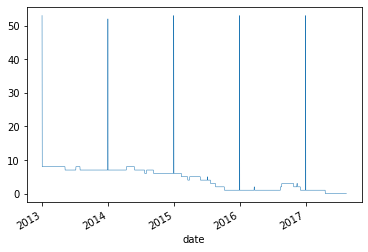

In [12]:
ceros=(df == 0).sum(axis=1)
ceros.plot(linewidth=0.5);
ceros.describe()


In [13]:
df['SD'] = (df == 0).sum(axis=1)

In [14]:
df[df['SD']>2]


Store 1       Store 2       Store 3       Store 4  \
date                                                                 
2013-01-01      0.000000      0.000000      0.000000      0.000000   
2013-01-02   7417.148000  10266.718981  24060.348000  10200.083980   
2013-01-03   5873.244001   7612.540000  18570.745025   7400.245000   
2013-01-04   5919.879001   7526.377000  17392.097995   6902.050001   
2013-01-05   6318.785010   9539.566000  22700.872005   9948.383000   
...                  ...           ...           ...           ...   
2016-11-14  11653.468000  15310.267998  35801.834030  11986.097000   
2016-11-15  10954.451000  12873.063004  30355.341000  12529.181000   
2016-11-16  14448.005010  16401.094990  43834.091800  16326.945996   
2016-11-17  10255.081000  13057.516000  28731.489000  10832.804000   
2017-01-01      0.000000      0.000000      0.000000      0.000000   

                 Store 5       Store 6       Store 7       Store 8  \
date                                                                 
2013-01-01      0.000000      0.000000      0.000000      0.000000   
2013-01-02  10598.619020  13520.485002  11997.502000  14659.328000   
2013-01-03   7770.968000   9929.393000   9277.958000  10781.243000   
2013-01-04   7347.641991   8869.211980   8096.573018  11124.651000   
2013-01-05   8192.598000  12431.689040   8610.605999  14277.699020   
...                  ...           ...           ...           ...   
2016-11-14  10176.095010  16524.451000  23610.130010  19359.098990   
2016-11-15   9608.078010  15555.309000  19280.175990  18450.693000   
2016-11-16  11045.909900  19478.993970  26812.520000  26726.621003   
2016-11-17   7174.726000  13169.112000  20064.424000  18067.248000   
2017-01-01      0.000000      0.000000      0.000000      0.000000   

                 Store 9    Store 10  ...      Store 46      Store 47  \
date                                  ...                               
2013-01-01      0.000000     0.00000  ...      0.000000      0.000000   
2013-01-02  15867.484000  5430.08800  ...  27149.920000  27263.111010   
2013-01-03  10431.719000  4549.52998  ...  15751.355000  18340.205000   
2013-01-04   8085.159000  3381.01600  ...  17073.064080  18982.008970   
2013-01-05  13057.110000  5409.78501  ...  27231.198030  26996.263995   
...                  ...         ...  ...           ...           ...   
2016-11-14  15683.447000  5986.93000  ...  25283.125020  34732.205000   
2016-11-15  18660.776000  5462.12100  ...  22761.122002  29150.718000   
2016-11-16  16524.661980  6554.92400  ...  29296.964000  40759.885980   
2016-11-17  14952.649004  4906.19701  ...  20727.938999  28187.925000   
2017-01-01      0.000000     0.00000  ...      0.000000      0.000000   

                Store 48   Store 49     Store 50      Store 51  Store 52  \
date                                                                       
2013-01-01      0.000000      0.000      0.00000      0.000000       0.0   
2013-01-02  19700.000000  16281.845  16576.13200  15134.490990       0.0   
2013-01-03  14350.784030   9909.082  11066.46504  11170.057015       0.0   
2013-01-04  15276.803001  10284.566  12147.44000  12452.326000       0.0   
2013-01-05  22876.474000  13506.025  17930.36400  15046.247000       0.0   
...                  ...        ...          ...           ...       ...   
2016-11-14  18064.407000  36811.903  18169.86798  20345.852000       0.0   
2016-11-15  17641.779000  29026.315  15925.45302  18527.325000       0.0   
2016-11-16  22081.870000  41542.726  21242.40300  25366.566990       0.0   
2016-11-17  16804.616006  29365.344  15938.96700  20234.405000       0.0   
2017-01-01      0.000000      0.000      0.00000      0.000000       0.0   

             Store 53      Store 54  SD  
date                                     
2013-01-01      0.000      0.000000  53  
2013-01-02      0.000   4973.285000   8  
2013-01-03      0.000   3901.570000   8  
2013-01-04      0.000   3266.966000   8  
2013

Elimino los 5 dias en que todas las tiendas permanecen cerradas, que corresponden a los dias 1 de enero de cada año.

In [15]:
df_limpio = df.drop(df[df['SD']>10].index)
df_limpio

Store 1       Store 2       Store 3       Store 4  \
date                                                                 
2013-01-02   7417.148000  10266.718981  24060.348000  10200.083980   
2013-01-03   5873.244001   7612.540000  18570.745025   7400.245000   
2013-01-04   5919.879001   7526.377000  17392.097995   6902.050001   
2013-01-05   6318.785010   9539.566000  22700.872005   9948.383000   
2013-01-06   2199.087000  10322.388000  25343.620000  11679.692000   
...                  ...           ...           ...           ...   
2017-08-11   5403.742021  13081.771001  32885.759996  10819.543000   
2017-08-12   7543.623000  12382.416000  31903.476000  10622.300000   
2017-08-13   3902.782000  13766.822095  34845.119300  13065.903000   
2017-08-14  10433.314000  12211.461020  32843.704026  10911.890000   
2017-08-15   9823.551018  11196.260002  30185.602000   9709.086000   

                 Store 5       Store 6       Store 7      Store 8  \
date                                                                
2013-01-02  10598.619020  13520.485002  11997.502000  14659.32800   
2013-01-03   7770.968000   9929.393000   9277.958000  10781.24300   
2013-01-04   7347.641991   8869.211980   8096.573018  11124.65100   
2013-01-05   8192.598000  12431.689040   8610.605999  14277.69902   
2013-01-06  10843.232030  16533.561996   8770.658000  14425.47098   
...                  ...           ...           ...          ...   
2017-08-11   9510.871000  15775.922000  15090.052970  18440.07100   
2017-08-12   8157.070000  14502.508000  14668.772022  19548.54801   
2017-08-13  10044.821000  19261.918980  14871.927000  21646.66000   
2017-08-14   9011.574900  14206.605030  19957.600000  19140.13700   
2017-08-15   8703.693000  13849.208995  18744.295980  17723.87600   

                 Store 9    Store 10  ...     Store 46      Store 47  \
date                                  ...                              
2013-01-02  15867.484000  5430.08800  ...  27149.92000  27263.111010   
2013-01-03  10431.719000  4549.52998  ...  15751.35500  18340.205000   
2013-01-04   8085.159000  3381.01600  ...  17073.06408  18982.008970   
2013-01-05  13057.110000  5409.78501  ...  27231.19803  26996.263995   
2013-01-06  15936.530000  5722.05301  ...  34434.42700  31646.356980   
...                  ...         ...  ...          ...           ...   
2017-08-11  15569.746000  5932.17900  ...  32020.67400  38072.657020   
2017-08-12  16901.506991  6322.80800  ...  28639.05300  34385.410000   
2017-08-13  18128.805000  6773.54200  ...  32935.39800  38953.744000   
2017-08-14  15978.709000  6236.74100  ...  23917.60600  31814.268000   
2017-08-15  18636.477000  6806.59200  ...  22348.41497  31653.691000   

                Store 48      Store 49      Store 50      Store 51   Store 52  \
date                                                                            
2013-01-02  19700.000000  16281.845000  16576.132000  15134.490990      0.000   
2013-01-03  14350.784030   9909.082000  11066.465040  11170.057015      0.000   
2013-01-04  15276.803001  10284.566000  12147.440000  12452.326000      0.000   
2013-01-05  22876.474000  13506.025000  17930.364000  15046.247000      0.000   
2013-01-06  28802.994020  16539.775996  16832.681020  15730.168990      0.000   
...                  ...           ...           ...           ...        ...   
2017-08-11  26365.391000  32977.570000  21339.243004  26070.018000  30742.706   
2017-08-12  24749.852000  30722.046040  19413.958001  19532.964000  22525.366   
2017-08-13  29164.995000  32984.485000  21221.233000  25713.284030  24232.105   
2017-08-14  20146.347000  31229.006000  18468.114000  18932.967000  18840.373   
2017-08-15  17695.050000  28429.226003  16879.121004  20154.559000  18600.046   

               Store 53      Store 54  SD  
date                                       
2013-01-02      0.00000   4973.285000   8  
2013-01-03      0.00000   3901.570000   8  
2013-01-04      0.00000   3266.966000   8

count    1679.000000
mean        4.278737
std         2.776278
min         1.000000
25%         1.000000
50%         5.000000
75%         7.000000
max         8.000000
dtype: float64

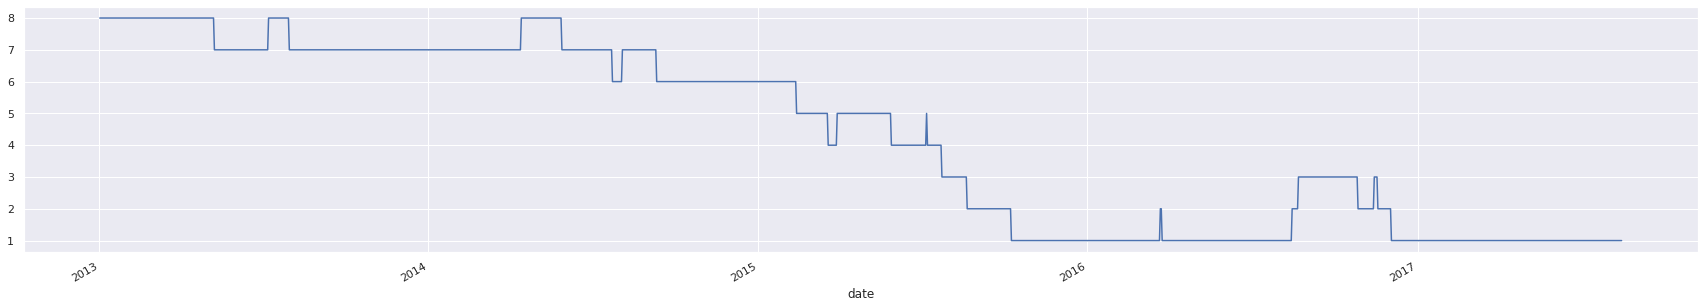

In [16]:
sns.set(rc={'figure.figsize':(30, 5)})
ceros=(df_limpio == 0).sum(axis=1)
ceros.plot();
ceros.describe()

In [17]:
pd.options.display.max_columns = None
df_limpio.describe()

Store 1        Store 2       Store 3       Store 4       Store 5  \
count   1679.000000    1679.000000   1679.000000   1679.000000   1679.000000   
mean    8424.665199   12839.421468  30066.652880  11262.477892   9286.721008   
std     3404.721740    5657.591508  11222.063215   4162.889665   2470.192993   
min        0.000000    4872.602998  11454.688000   4038.048000   3938.656000   
25%     5613.645001    9001.655500  20185.570500   7917.113998   7497.228500   
50%     8527.191000   12583.582970  29569.358010  10960.236000   9144.854000   
75%    11079.199050   15354.880015  37308.664250  13467.785488  10668.039490   
max    21788.900000  136457.427000  69516.386030  26557.102000  22555.506000   

            Store 6       Store 7       Store 8       Store 9      Store 10  \
count   1679.000000   1679.000000   1679.000000   1679.000000   1679.000000   
mean   14999.213816  16052.441681  18162.172083  15729.268055   5725.971254   
std     5592.970950   5659.615381   6694.493058   5934.661810   1669.158672   
min     5753.537000   4781.043010   7525.230000   5777.136000   2084.932000   
25%    10597.208500  10433.494040  12291.801450  11395.745500   4506.658500   
50%    14525.231000  17263.954000  17727.089000  14597.294000   5489.162000   
75%    17812.348000  20524.514495  22365.022000  18905.965500   6685.295501   
max    37344.259000  36744.413000  41095.617000  58939.425000  21348.774010   

           Store 11      Store 12      Store 13      Store 14      Store 15  \
count   1679.000000   1679.000000   1679.000000   1679.000000   1679.000000   
mean   16870.493437   6348.551493   6267.448373   6782.560303   6820.291854   
std     4968.125727   2187.054181   1999.661032   2261.234505   1790.937295   
min     7330.076000      0.000000   2724.931000      0.000000   2484.305000   
25%    13267.126515   5037.654500   4787.673998   5327.143995   5354.644000   
50%    16197.126000   6395.882000   5987.149000   6539.037000   6837.644000   
75%    19703.413988   7646.325505   7336.875005   7919.300000   8031.526500   
max    39085.735000  20826.648000  16745.100010  16445.920004  17315.300000   

           Store 16      Store 17      Store 18      Store 19       Store 20  \
count   1679.000000   1679.000000   1679.000000   1679.000000    1679.000000   
mean    6543.426179  10739.112120   7897.186236   7772.191684    7695.625130   
std     2025.160057   4414.602016   3930.791350   2801.751063    8766.829795   
min      802.107000      0.000000      0.000000   2852.533010       0.000000   
25%     5093.081500   7280.228500   5350.787500   5786.799695       0.000000   
50%     6172.165000  10137.577000   7628.773000   7406.493000    7945.413990   
75%     7545.568500  13524.342000   9927.583500   9093.157000   12807.610500   
max    16480.830999  29398.391000  29701.359000  20718.453000  117725.098000   

           Store 21      Store 22      Store 23      Store 24      Store 25  \
count   1679.000000   1679.000000   1679.000000   1679.000000   1679.000000   
mean    5512.510965   2436.093949   6939.476280  14155.886064   6773.200838   
std     6771.757960   3170.512410   1763.636195   5799.792648   4754.796005   
min        0.000000      0.000000   3165.415000      0.000000      0.000000   
25%        0.000000      0.000000   5430.266008  10512.507500   4188.559002   
50%        0.000000      0.000000   7032.357000  14703.083001   5783.877000   
75%    10753.593000   5364.570500   8095.826000  18065.720455   7939.559000   
max    33689.363980  21571.010010  14079.289000  54672.039970  39140.266900   

           Store 26      Store 27      Store 28      Store 29      Store 30  \
count   1679.000000   1679.000000   1679.000000   1679.000000   1679.000000   
mean    4618.893325  11428.243825  10948.871253   5792.232100   4396.708555   
std     2408.453255   4670.425450   5082.371394   6107.482172   1616.374022   
min     1904.157000   2719.784000   2568.746006      0.000000      0.000000   
25%     3284.641500   7645.259002   724

Eliminacion de todas las tiendas que estan cerradas.

In [18]:
df_limpio=df_limpio.drop(['Store 1', 'Store 12', 'Store 14', 'Store 17', 'Store 18', 'Store 20', 'Store 21', 'Store 22', 'Store 24', 'Store 25', 'Store 29', 'Store 30', 'Store 36', 'Store 42', 'Store 43', 'Store 52', 'Store 53'], axis=1)


In [19]:
df_limpio=df_limpio.drop(['SD'], axis=1)

count    1679.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

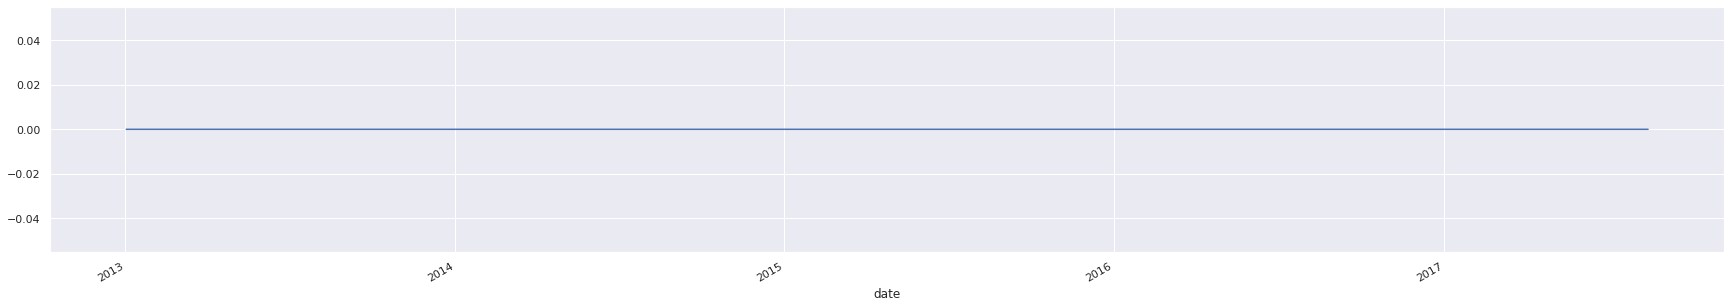

In [20]:
sns.set(rc={'figure.figsize':(30, 5)})
ceros=(df_limpio == 0).sum(axis=1)
ceros.plot();
ceros.describe()

###**Analisis de distribuciones - Estadística Descriptiva:**



In [21]:
df_limpio.describe()

Store 2       Store 3       Store 4       Store 5       Store 6  \
count    1679.000000   1679.000000   1679.000000   1679.000000   1679.000000   
mean    12839.421468  30066.652880  11262.477892   9286.721008  14999.213816   
std      5657.591508  11222.063215   4162.889665   2470.192993   5592.970950   
min      4872.602998  11454.688000   4038.048000   3938.656000   5753.537000   
25%      9001.655500  20185.570500   7917.113998   7497.228500  10597.208500   
50%     12583.582970  29569.358010  10960.236000   9144.854000  14525.231000   
75%     15354.880015  37308.664250  13467.785488  10668.039490  17812.348000   
max    136457.427000  69516.386030  26557.102000  22555.506000  37344.259000   

            Store 7       Store 8       Store 9      Store 10      Store 11  \
count   1679.000000   1679.000000   1679.000000   1679.000000   1679.000000   
mean   16052.441681  18162.172083  15729.268055   5725.971254  16870.493437   
std     5659.615381   6694.493058   5934.661810   1669.158672   4968.125727   
min     4781.043010   7525.230000   5777.136000   2084.932000   7330.076000   
25%    10433.494040  12291.801450  11395.745500   4506.658500  13267.126515   
50%    17263.954000  17727.089000  14597.294000   5489.162000  16197.126000   
75%    20524.514495  22365.022000  18905.965500   6685.295501  19703.413988   
max    36744.413000  41095.617000  58939.425000  21348.774010  39085.735000   

           Store 13      Store 15      Store 16      Store 19      Store 23  \
count   1679.000000   1679.000000   1679.000000   1679.000000   1679.000000   
mean    6267.448373   6820.291854   6543.426179   7772.191684   6939.476280   
std     1999.661032   1790.937295   2025.160057   2801.751063   1763.636195   
min     2724.931000   2484.305000    802.107000   2852.533010   3165.415000   
25%     4787.673998   5354.644000   5093.081500   5786.799695   5430.266008   
50%     5987.149000   6837.644000   6172.165000   7406.493000   7032.357000   
75%     7336.875005   8031.526500   7545.568500   9093.157000   8095.826000   
max    16745.100010  17315.300000  16480.830999  20718.453000  14079.289000   

           Store 26      Store 27      Store 28      Store 31      Store 32  \
count   1679.000000   1679.000000   1679.000000   1679.000000   1679.000000   
mean    4618.893325  11428.243825  10948.871253  10569.906314   3544.845740   
std     2408.453255   4670.425450   5082.371394   4232.370666   1509.290369   
min     1904.157000   2719.784000   2568.746006   2621.893998   1451.785000   
25%     3284.641500   7645.259002   7243.643995   7486.151501   2669.502000   
50%     4124.952000  11148.400896  10175.099998  10045.707000   3280.981000   
75%     5306.321995  14202.740500  13785.218995  12808.203000   4048.955998   
max    43563.033000  40102.023010  36743.614005  52419.514000  25127.471000   

           Store 33      Store 34      Store 35      Store 37      Store 38  \
count   1679.000000   1679.000000   1679.000000   1679.000000   1679.000000   
mean    8444.610657  10179.115044   4572.173569  11894.363082  11232.876272   
std     2826.242242   2560.176182   2344.205154   3458.070911   4089.744090   
min     2517.503000   4128.756000   1305.277000   2676.580001   4102.126005   
25%     6334.189495   8348.085005   3229.361000   8971.505995   8036.921500   
50%     8045.353980  10016.504000   4429.012996  12128.981000  10591.871000   
75%    10224.125490  11703.246500   5581.255505  14302.342000  13583.320500   
max    22169.688980  29824.028000  50977.860990  24581.945001  26825.178000   

            Store 39      Store 40      Store 41      Store 44       Store 45  \
count    1679.000000   1679.000000   1679.000000   1679.000000    1679.000000   
mean    12062.056303  10956.377252   8928.552197  36978.888178   32458.612517   
std      5083.361569   4328.584231   3922.237699  14587.832162   13595.411191   
min      3228.597000   2274.261000   2592.269000   9067.748000    2741.897999   
25%      8308.428507   7392.319500   58

Rolling para 7, 30 y 365 dias

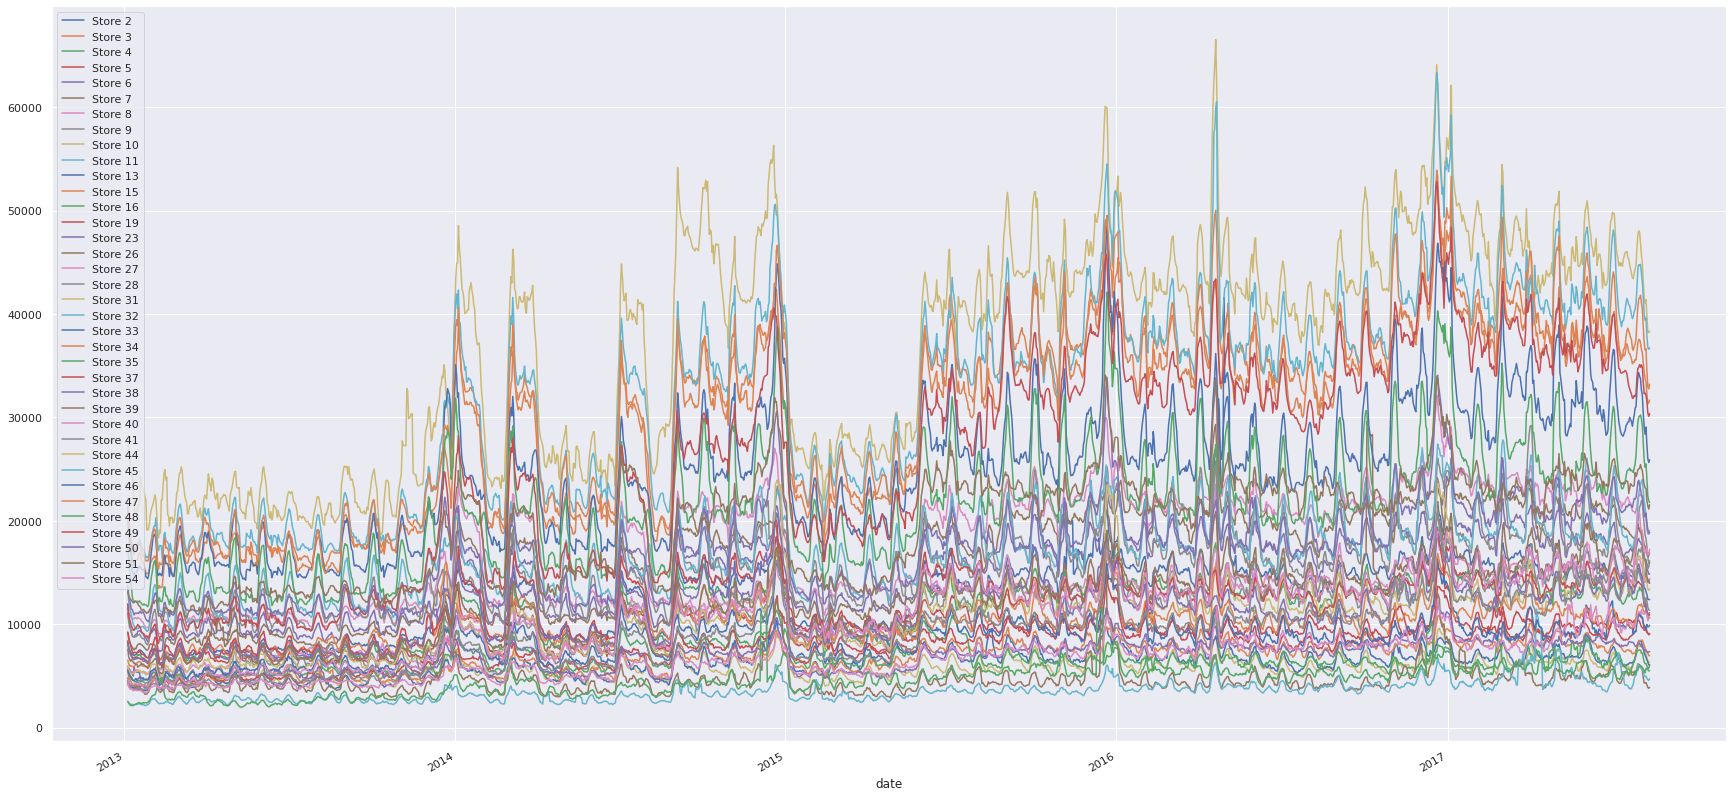

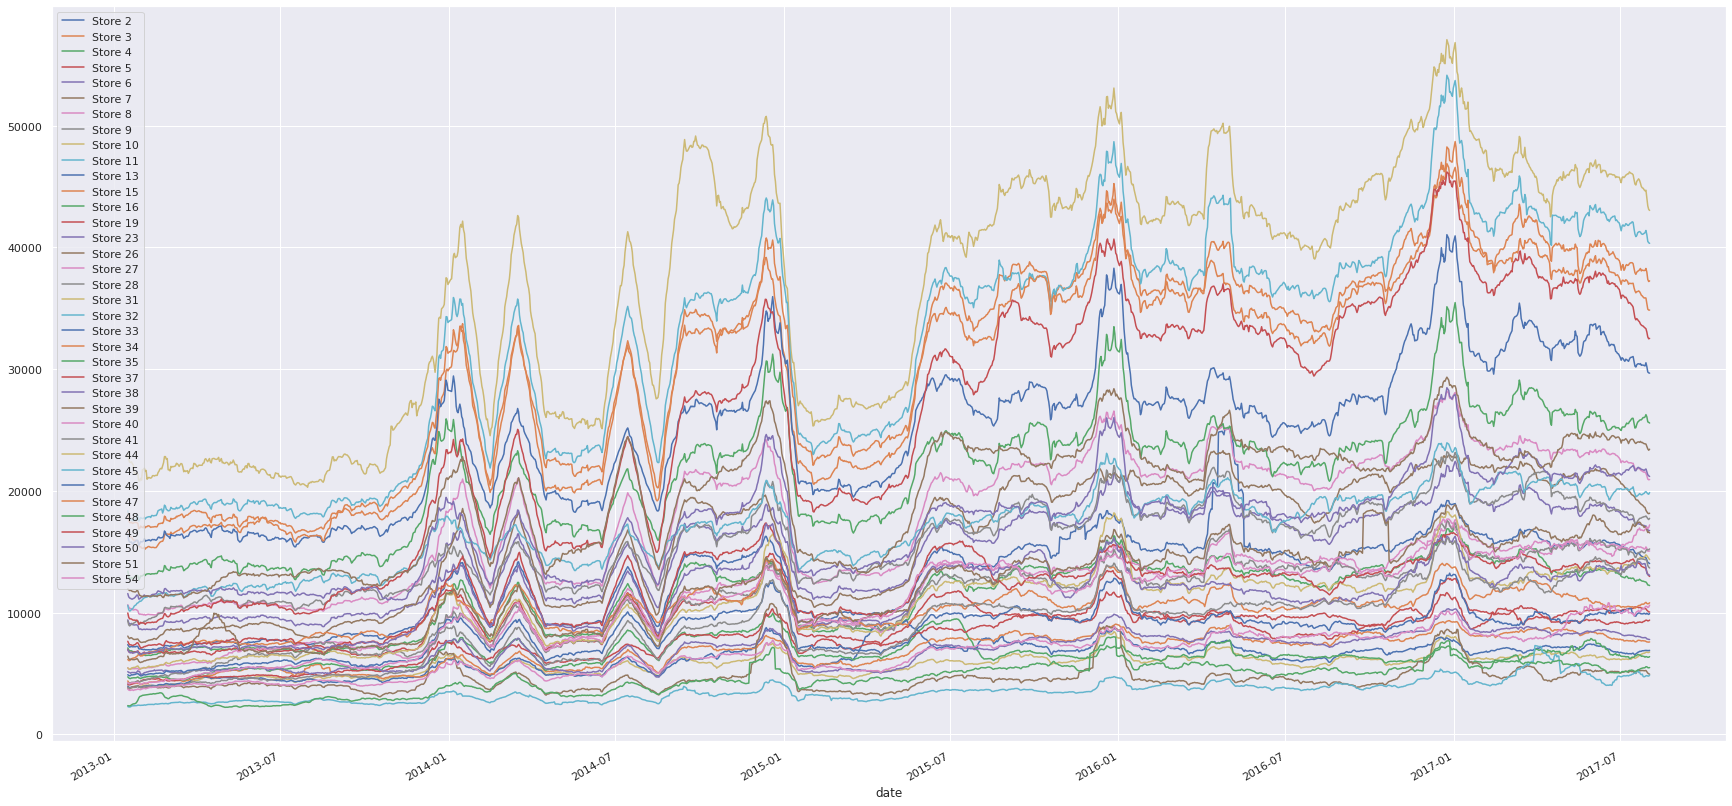

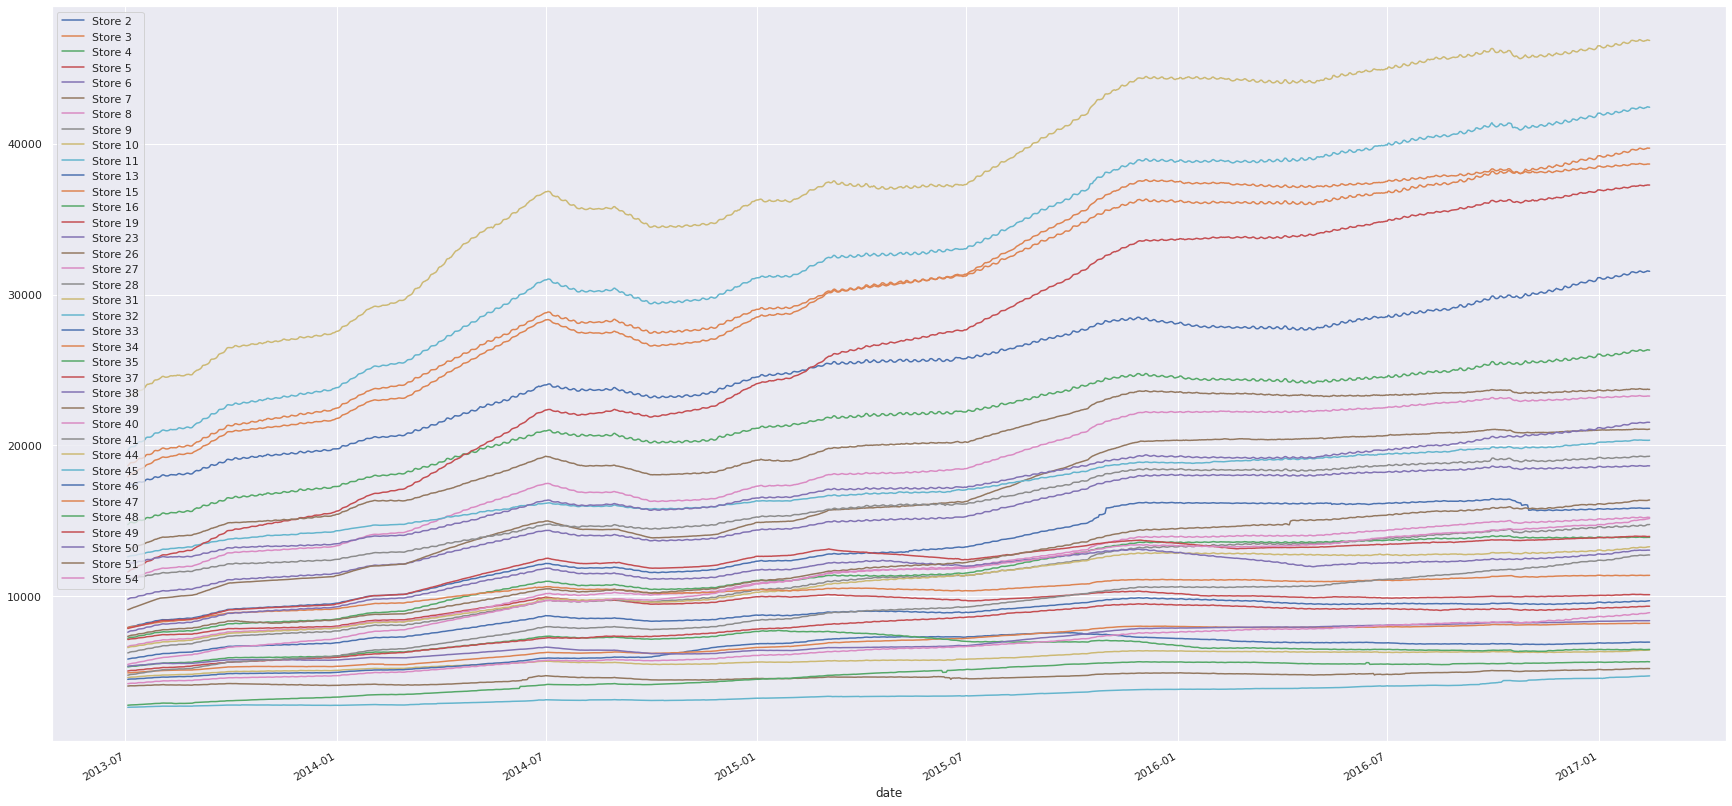

In [24]:
sns.set(rc={'figure.figsize':(30, 15)})
df_limpio.rolling(7, center=True).mean().plot()
df_limpio.rolling(28, center=True).mean().plot()
df_limpio.rolling(365, center=True).mean().plot()

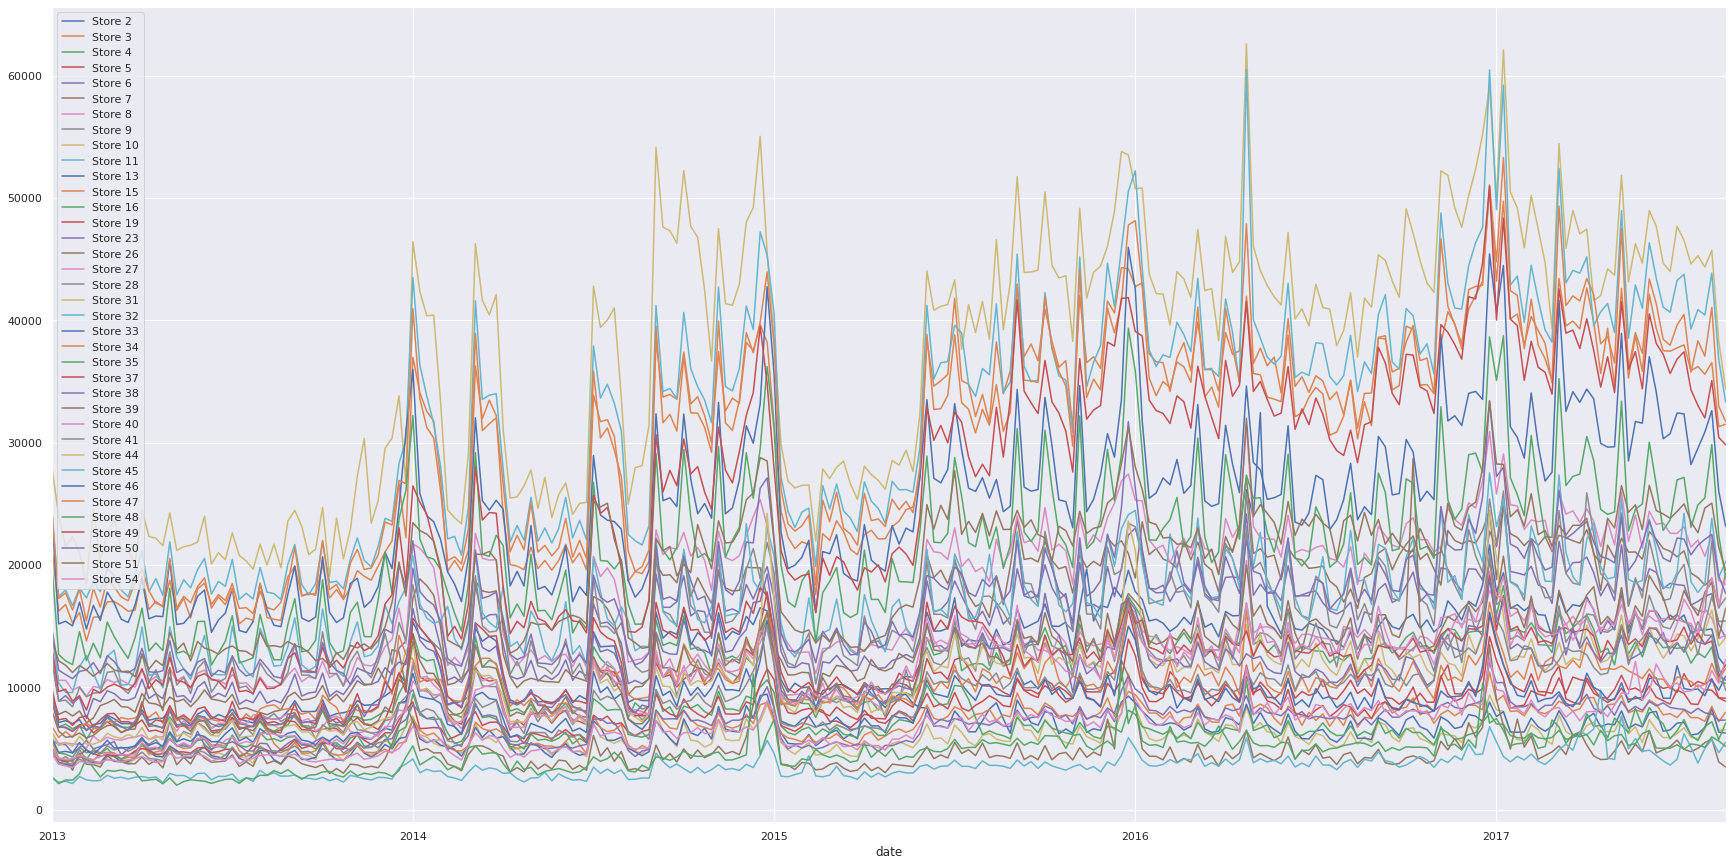

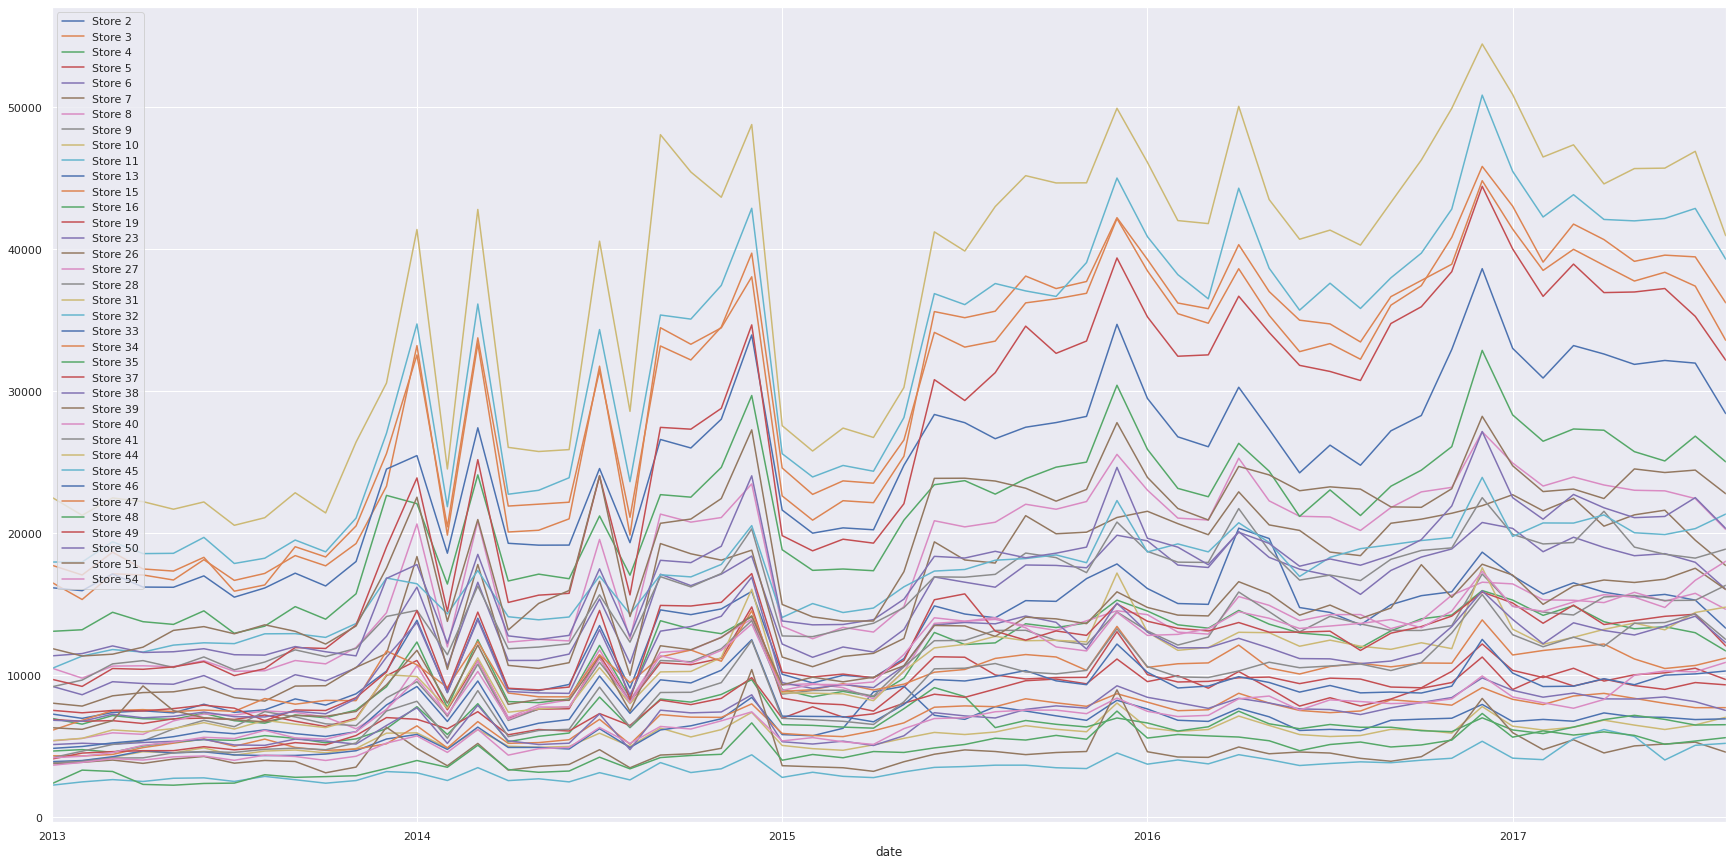

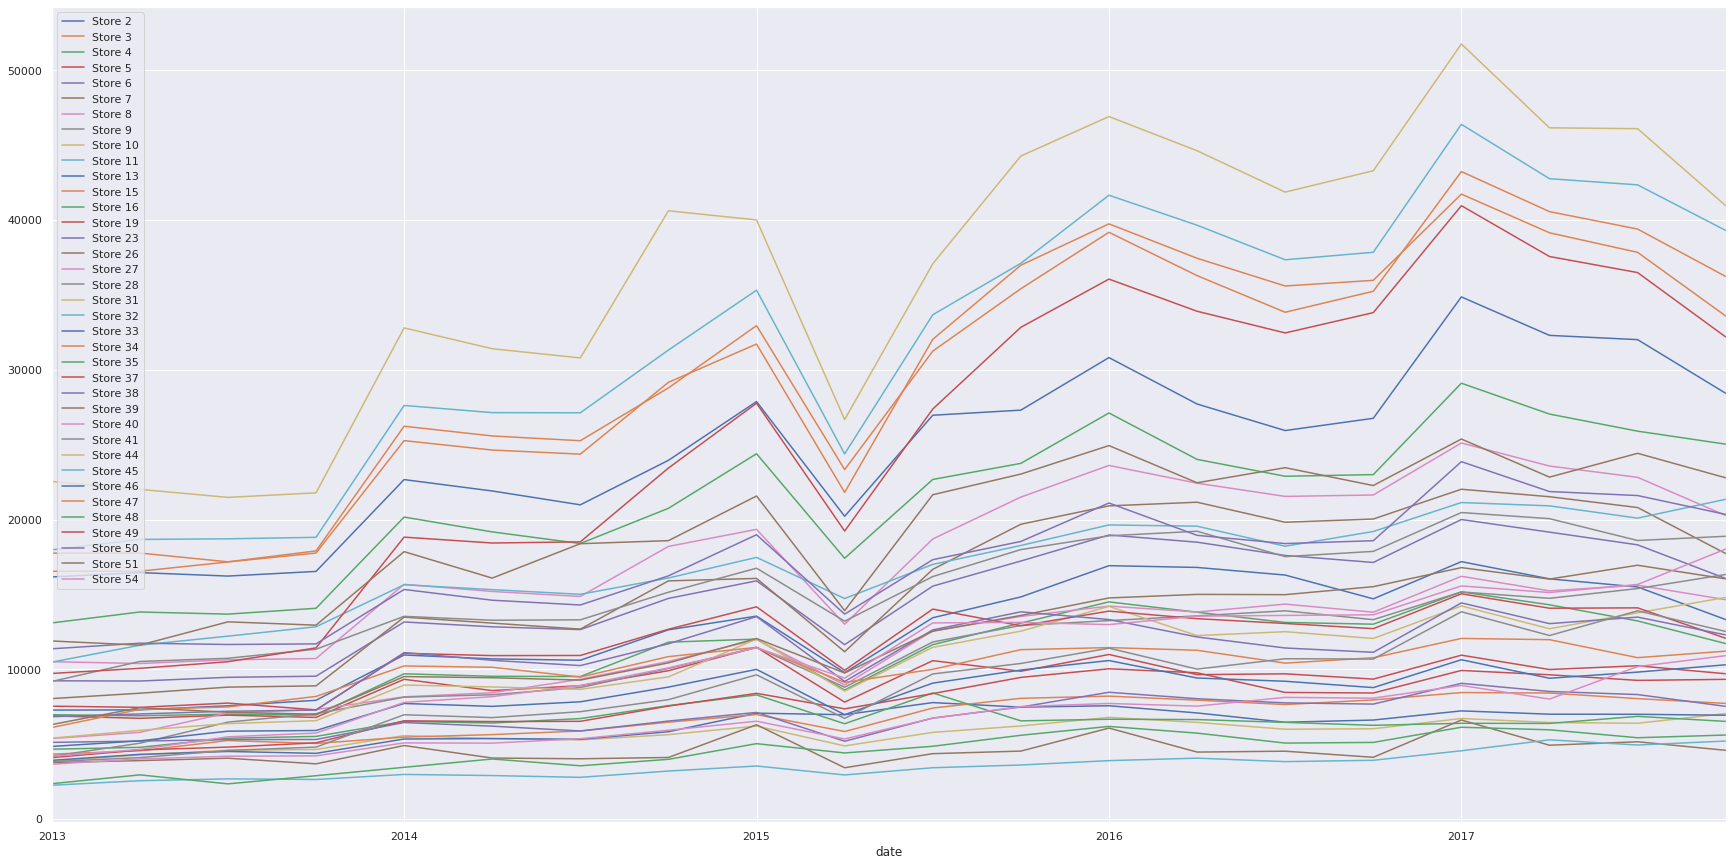

In [25]:
#Resampling
df_limpio_meanW = df_limpio.resample('W').mean()
df_limpio_meanM = df_limpio.resample('M').mean()
df_limpio_meanY = df_limpio.resample('3M').mean()
df_limpio_meanW.plot()
df_limpio_meanM.plot()
df_limpio_meanY.plot()

In [26]:
df_limpio.mean()

Store 2     12839.421468
Store 3     30066.652880
Store 4     11262.477892
Store 5      9286.721008
Store 6     14999.213816
Store 7     16052.441681
Store 8     18162.172083
Store 9     15729.268055
Store 10     5725.971254
Store 11    16870.493437
Store 13     6267.448373
Store 15     6820.291854
Store 16     6543.426179
Store 19     7772.191684
Store 23     6939.476280
Store 26     4618.893325
Store 27    11428.243825
Store 28    10948.871253
Store 31    10569.906314
Store 32     3544.845740
Store 33     8444.610657
Store 34    10179.115044
Store 35     4572.173569
Store 37    11894.363082
Store 38    11232.876272
Store 39    12062.056303
Store 40    10956.377252
Store 41     8928.552197
Store 44    36978.888178
Store 45    32458.612517
Store 46    24952.985183
Store 47    30344.437201
Store 48    21401.507012
Store 49    25860.688376
Store 50    17065.527472
Store 51    19601.840106
Store 54     6585.755282
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6a74da7d0>,
      dtype=object)

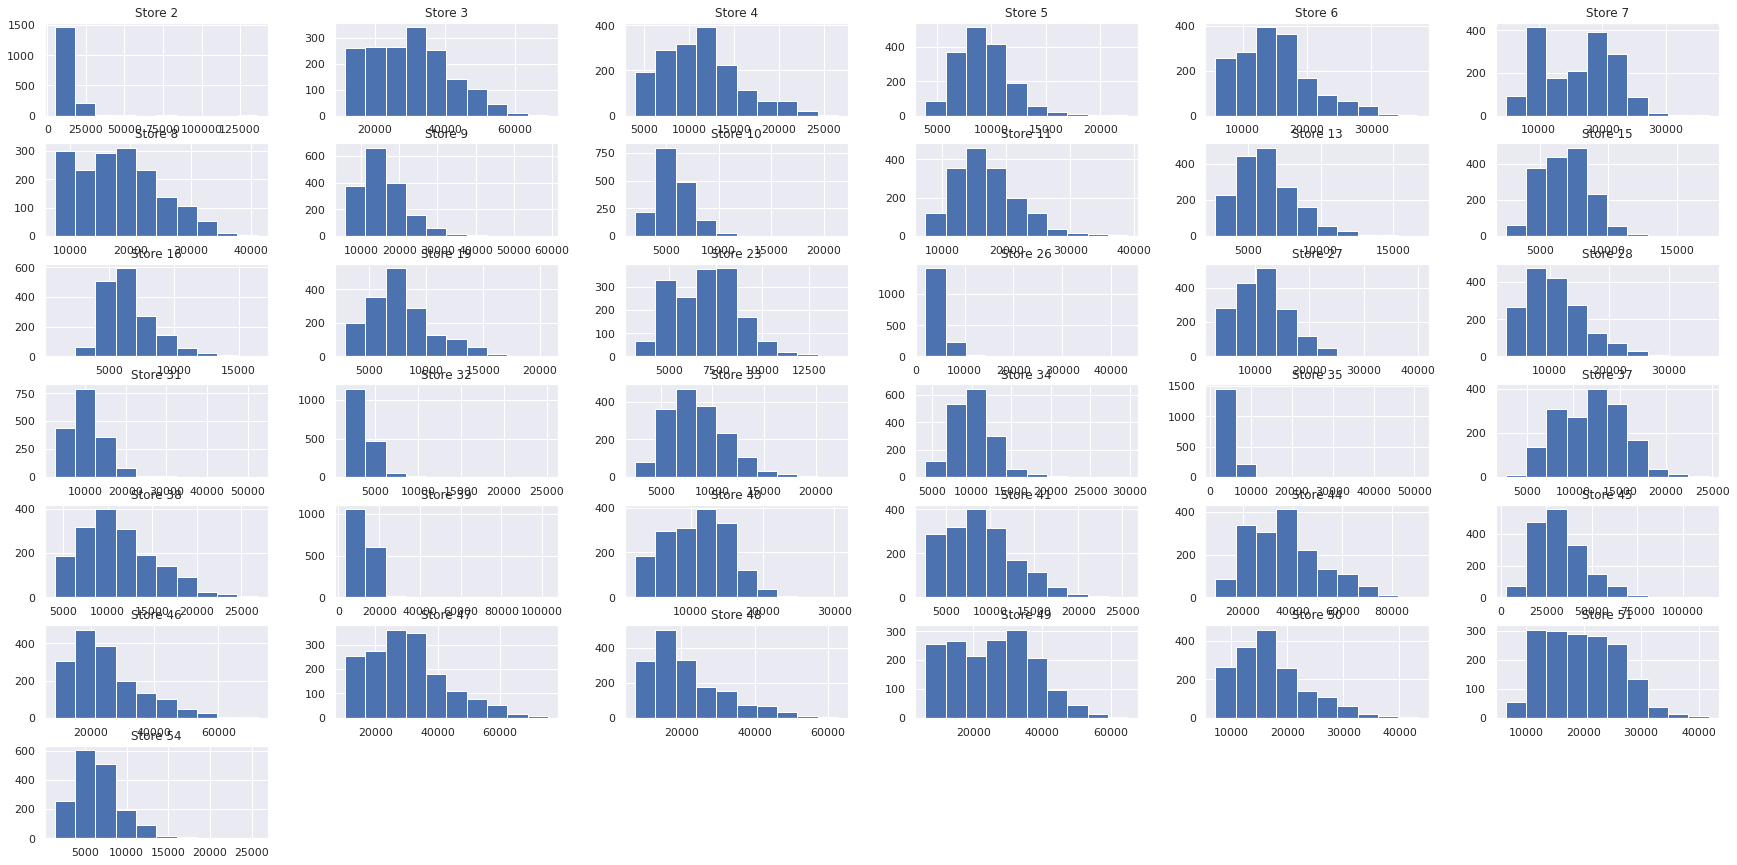

In [27]:
df_limpio.hist()

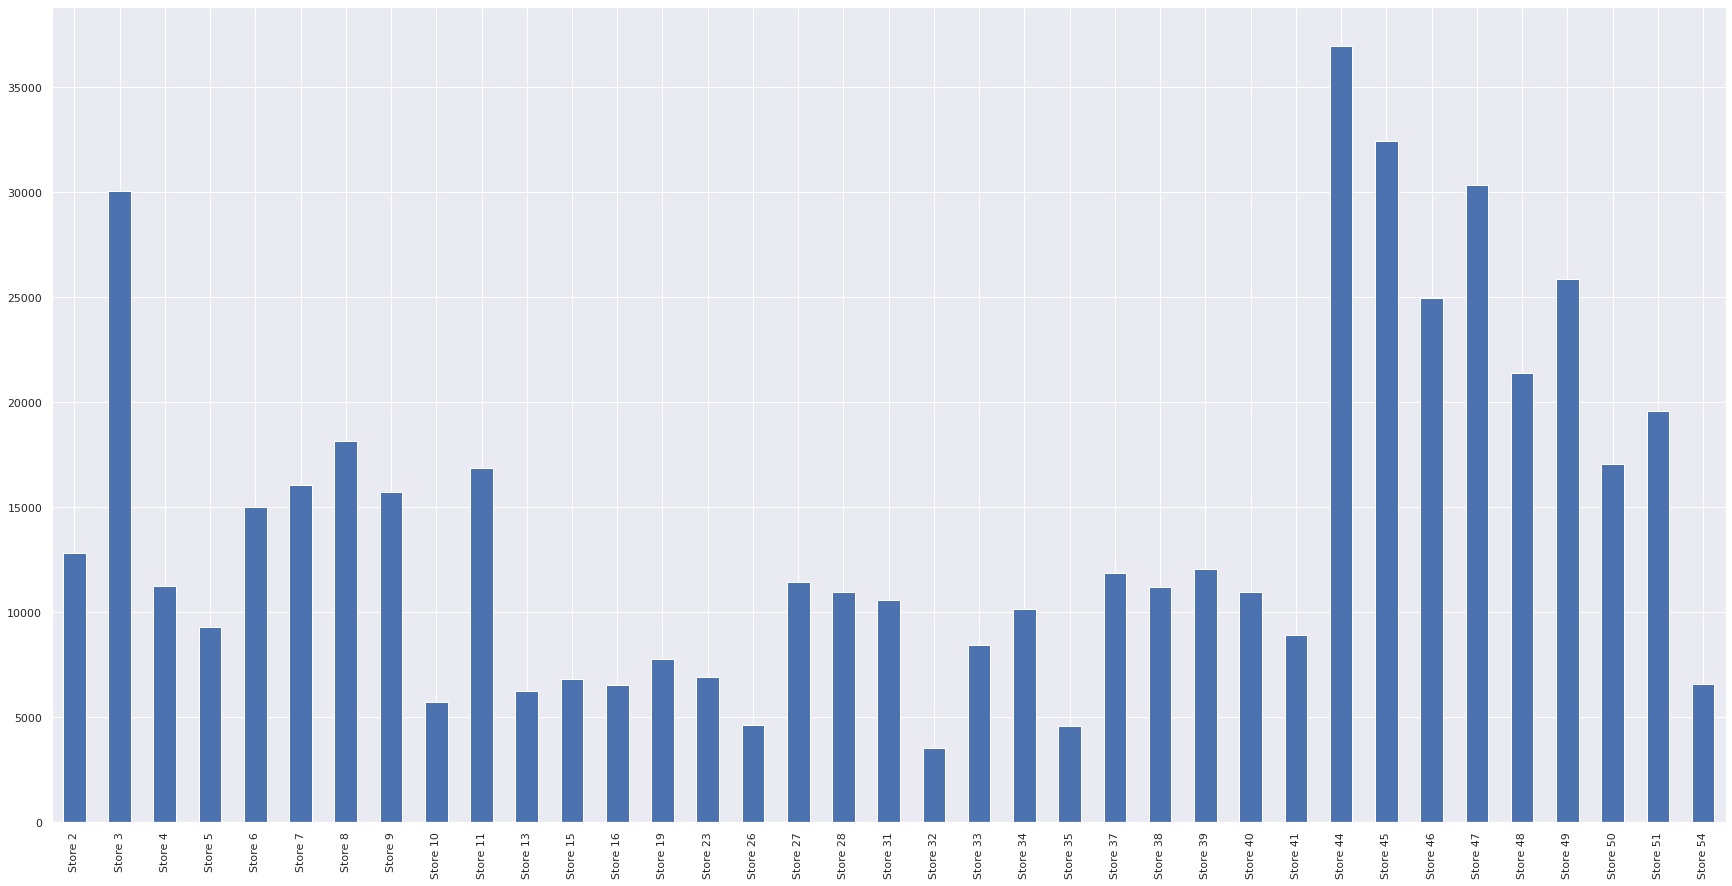

In [28]:
df_limpio.mean().plot.bar()

Hay bastante dispersion en los montos de ventas de las sucursales, se podrian dividir en 3 grandes grupos. 

In [29]:
df_limpio.mean().describe()

count       37.000000
mean     14053.210651
std       8505.121350
min       3544.845740
25%       7772.191684
50%      11262.477892
75%      17065.527472
max      36978.888178
dtype: float64

In [30]:
dfp_l=df_limpio[df_limpio.columns[df_limpio.mean()<df_limpio.mean().quantile(26/100)]]

dfm_l=df_limpio[df_limpio.columns[df_limpio.mean()<df_limpio.mean().quantile(74/100)]]
dfm_l=dfm_l[dfm_l.columns[dfm_l.mean()>dfm_l.mean().quantile(25/100)]]

dfg_l=df_limpio[df_limpio.columns[df_limpio.mean()>df_limpio.mean().quantile(75/100)]]



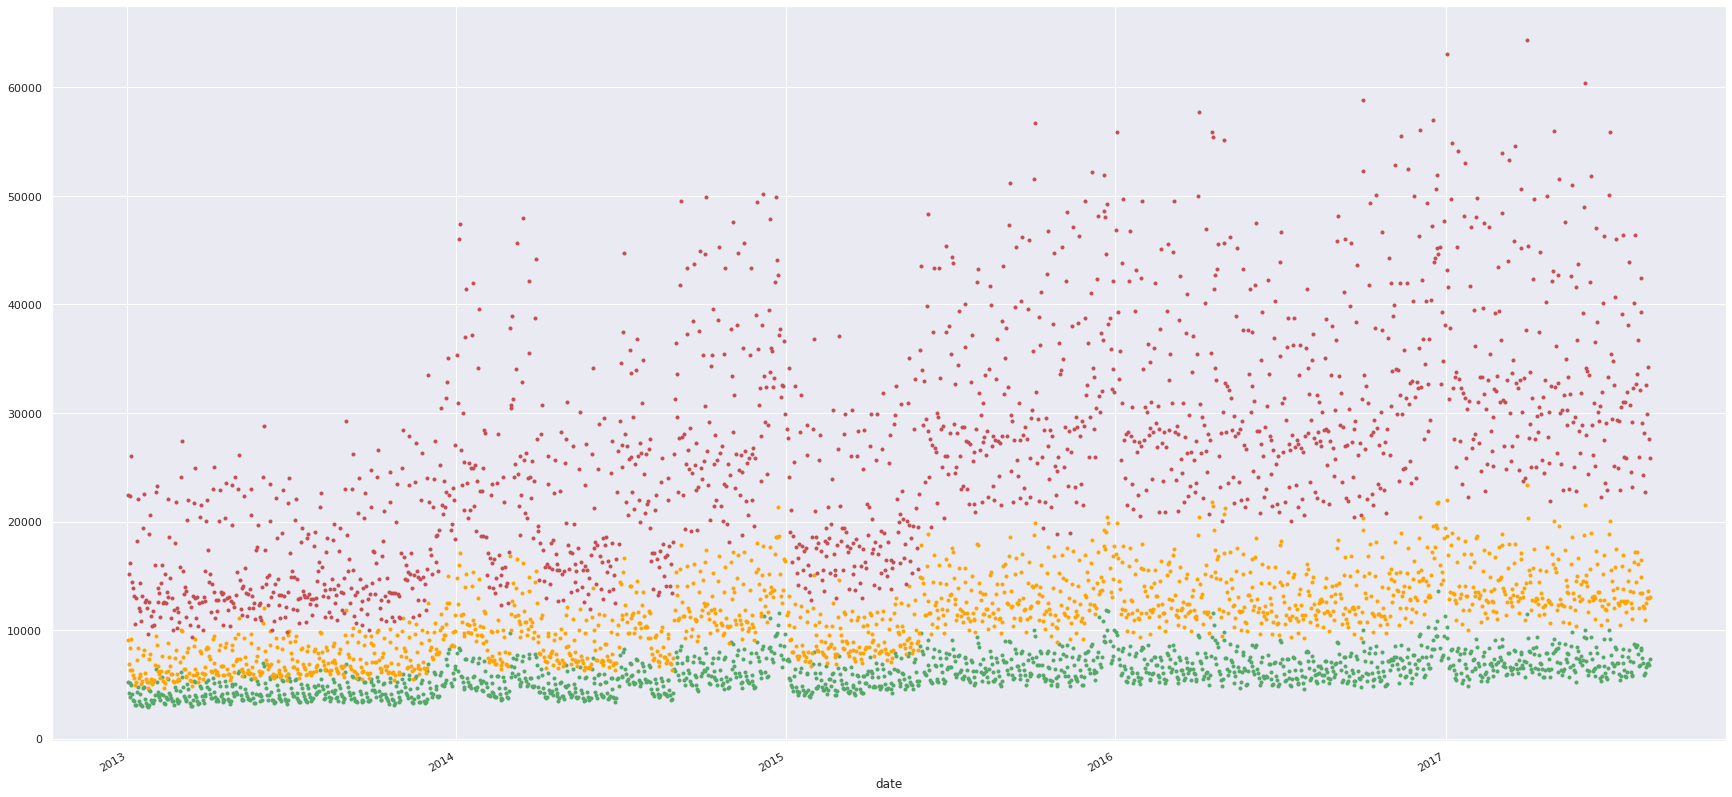

In [31]:
dfp_l.mean(axis=1).plot(marker='.', linestyle='None', color='g')
dfm_l.mean(axis=1).plot(marker='.', linestyle='None', color='orange')
dfg_l.mean(axis=1).plot(marker='.', linestyle='None', color='r')

**Grafica de medias moviles de 7 periodos.

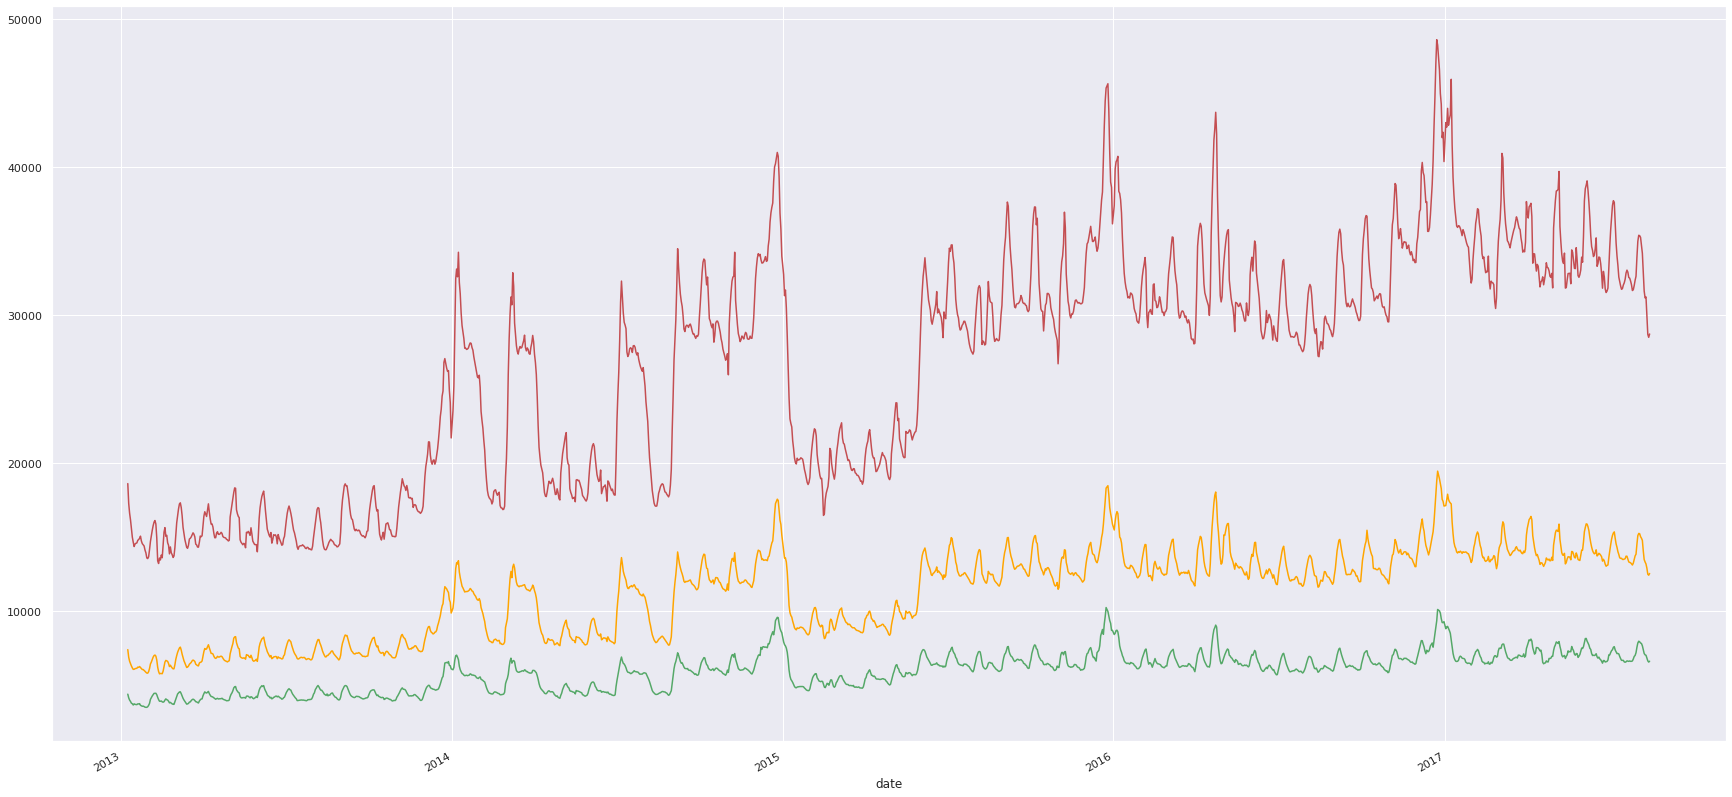

In [32]:
dfp_l.mean(axis=1).rolling(7).mean().plot(color='g')
dfm_l.mean(axis=1).rolling(7).mean().plot(color='orange')
dfg_l.mean(axis=1).rolling(7).mean().plot(color='r')

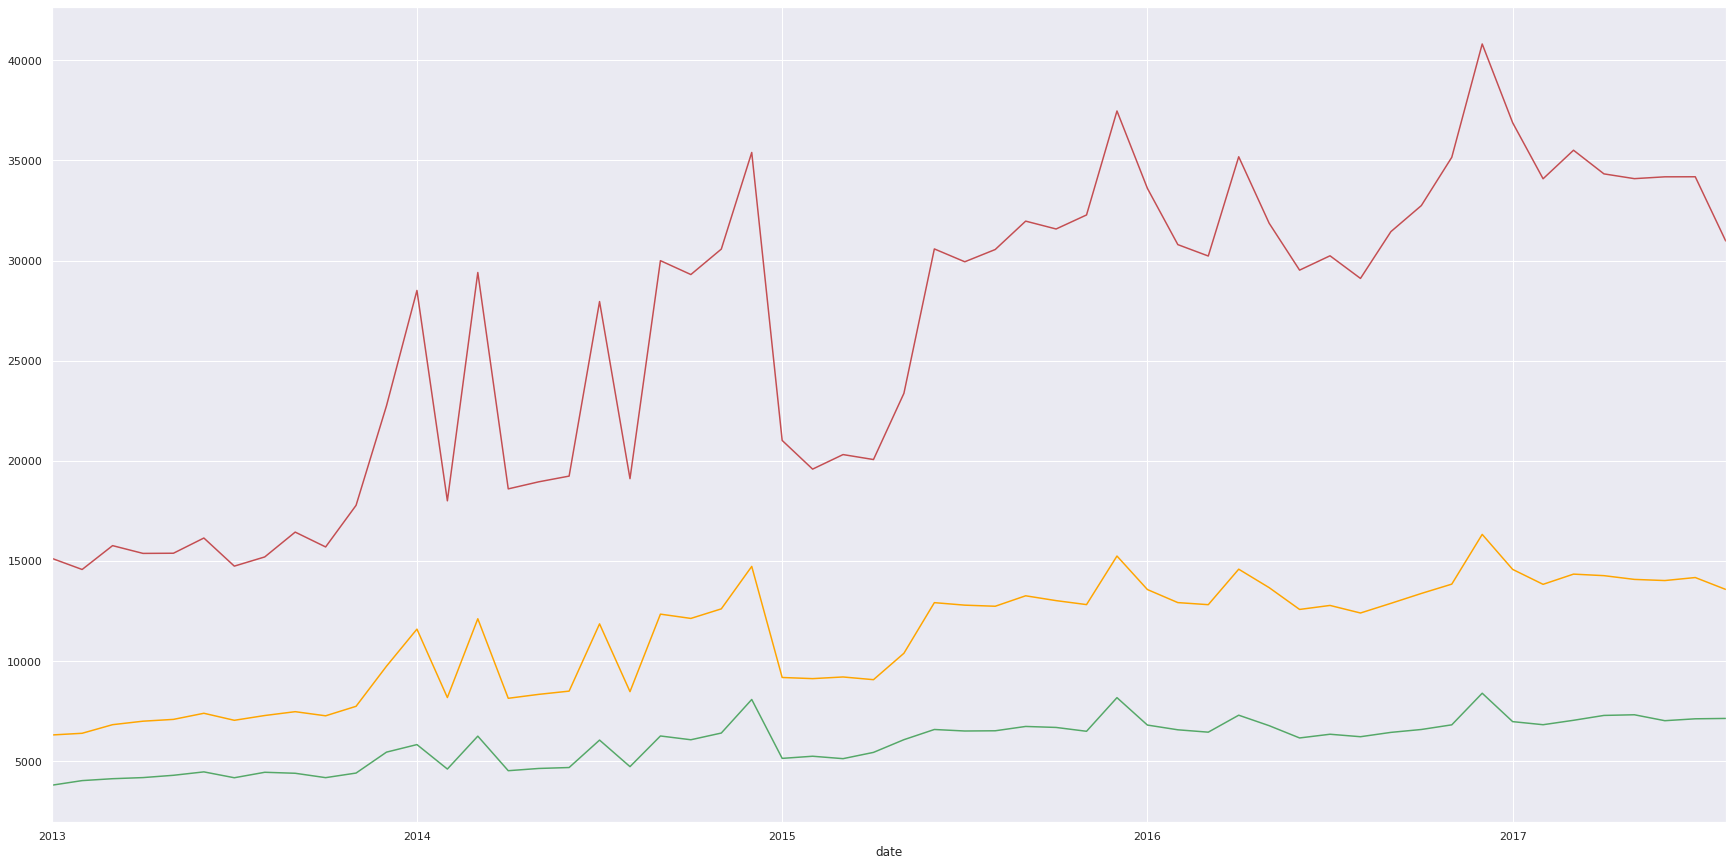

In [33]:
dfp_lW= dfp_l.mean(axis=1).resample('M').mean()
dfm_lW= dfm_l.mean(axis=1).resample('M').mean()
dfg_lW= dfg_l.mean(axis=1).resample('M').mean()

dfp_lW.plot(color='g')
dfm_lW.plot(color='orange')
dfg_lW.plot(color='r')

Hay una tendencia marcada creciente en las sucursales con volumenes de venta de nivel medio, en las tiendas mas grandes, en las tiendas mas peque;as si bien tambien parece haber una tendencia creciente, es mucho menos marcada. 

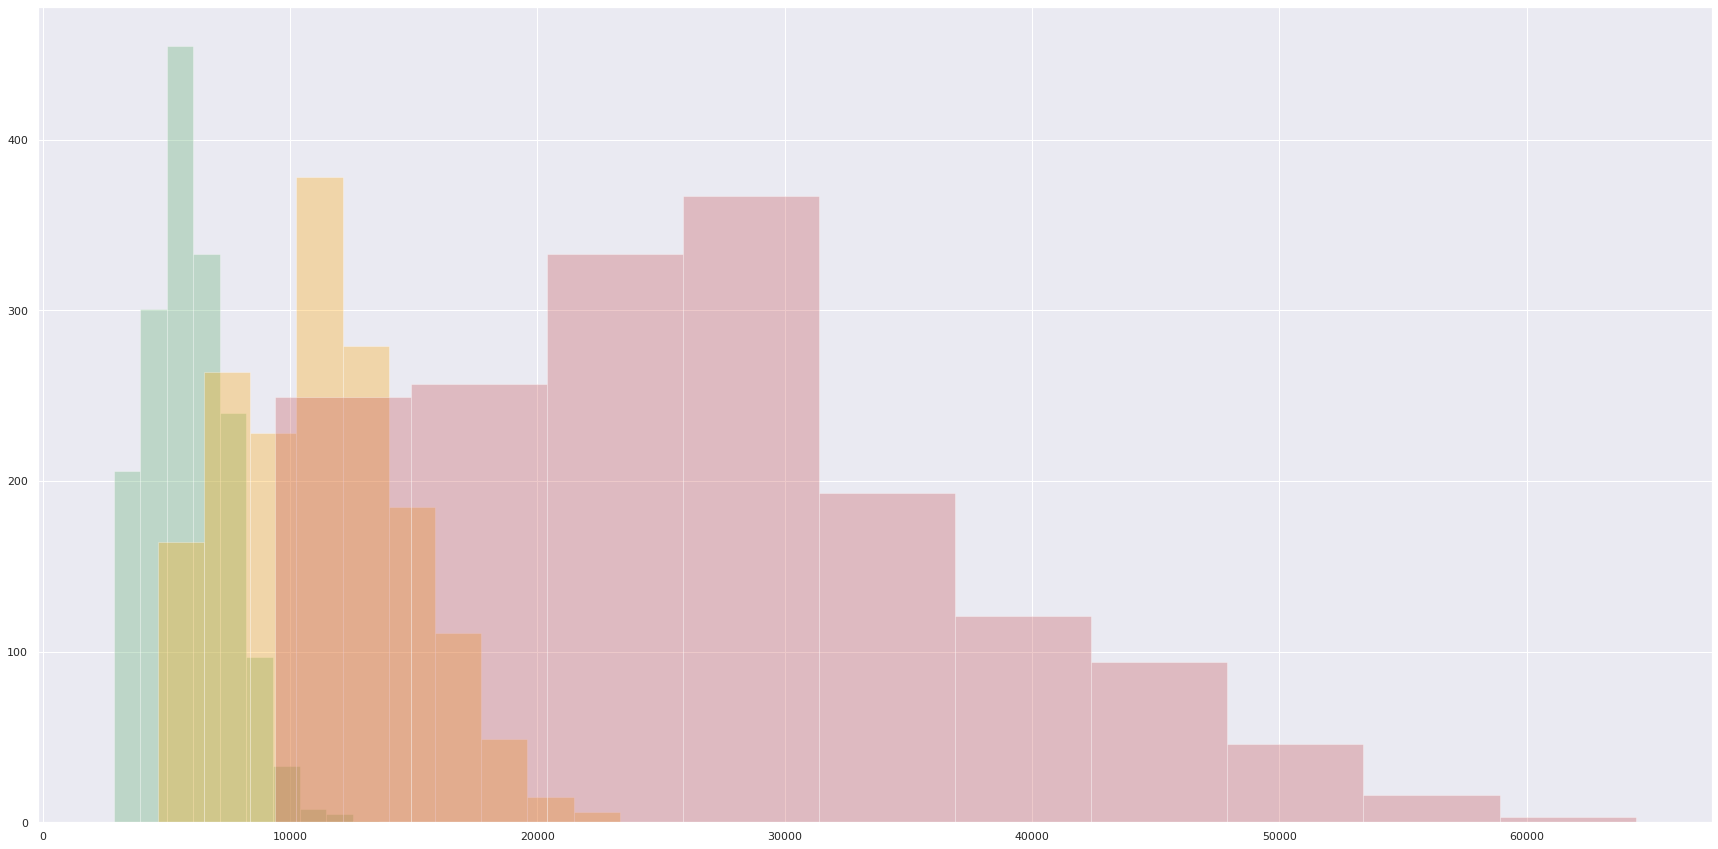

In [34]:
dfp_l.mean(axis=1).hist(alpha=0.3, color='g')
dfm_l.mean(axis=1).hist(alpha=0.3, color='orange')
dfg_l.mean(axis=1).hist(alpha=0.3, color='r')

In [35]:
dfp_l.mean(axis=1).describe(), dfm_l.mean(axis=1).describe(), dfg_l.mean(axis=1).describe()

(count     1679.000000
 mean      5939.047354
 std       1617.263669
 min       2877.984102
 25%       4789.284748
 50%       5776.685699
 75%       7038.266799
 max      13607.090800
 dtype: float64, count     1679.000000
 mean     11260.848469
 std       3527.917439
 min       4658.513349
 25%       8345.409750
 50%      11270.553497
 75%      13528.966301
 max      23333.942816
 dtype: float64, count     1679.000000
 mean     26647.531504
 std      10437.559729
 min       9386.907011
 25%      18282.705667
 50%      25906.686112
 75%      32567.377785
 max      64398.228127
 dtype: float64)

Si bien las tres subpoblaciones tienen areas de superposicion, la seleccion realizada tiene medidas de tendencia central bien diferenciadas. 

¿Hay outliers? Si es así, ¿qué sugiere hacer con ellos?

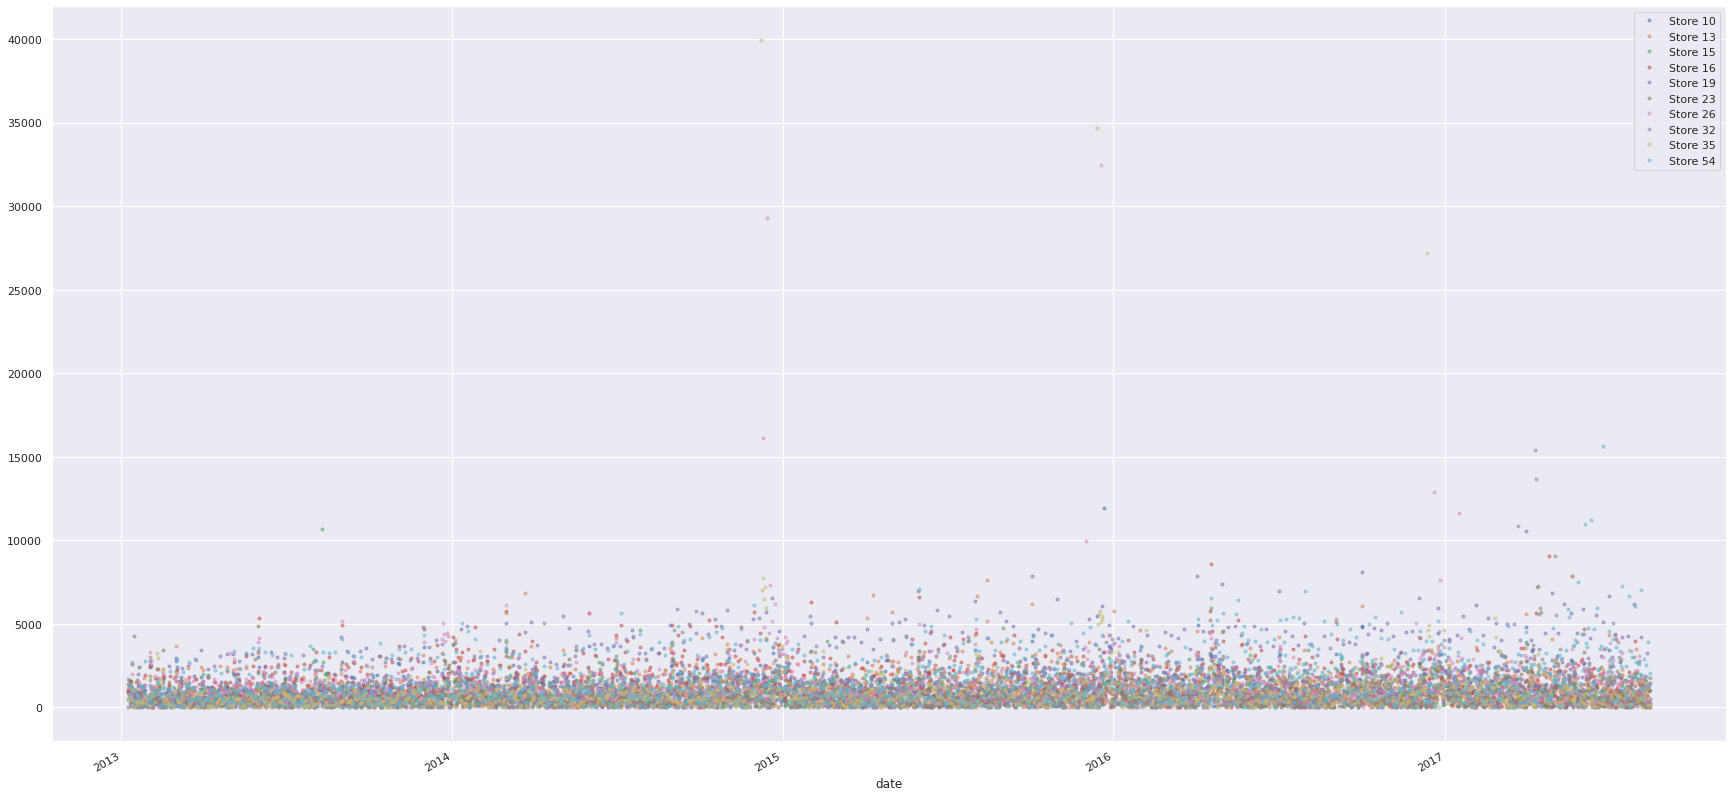

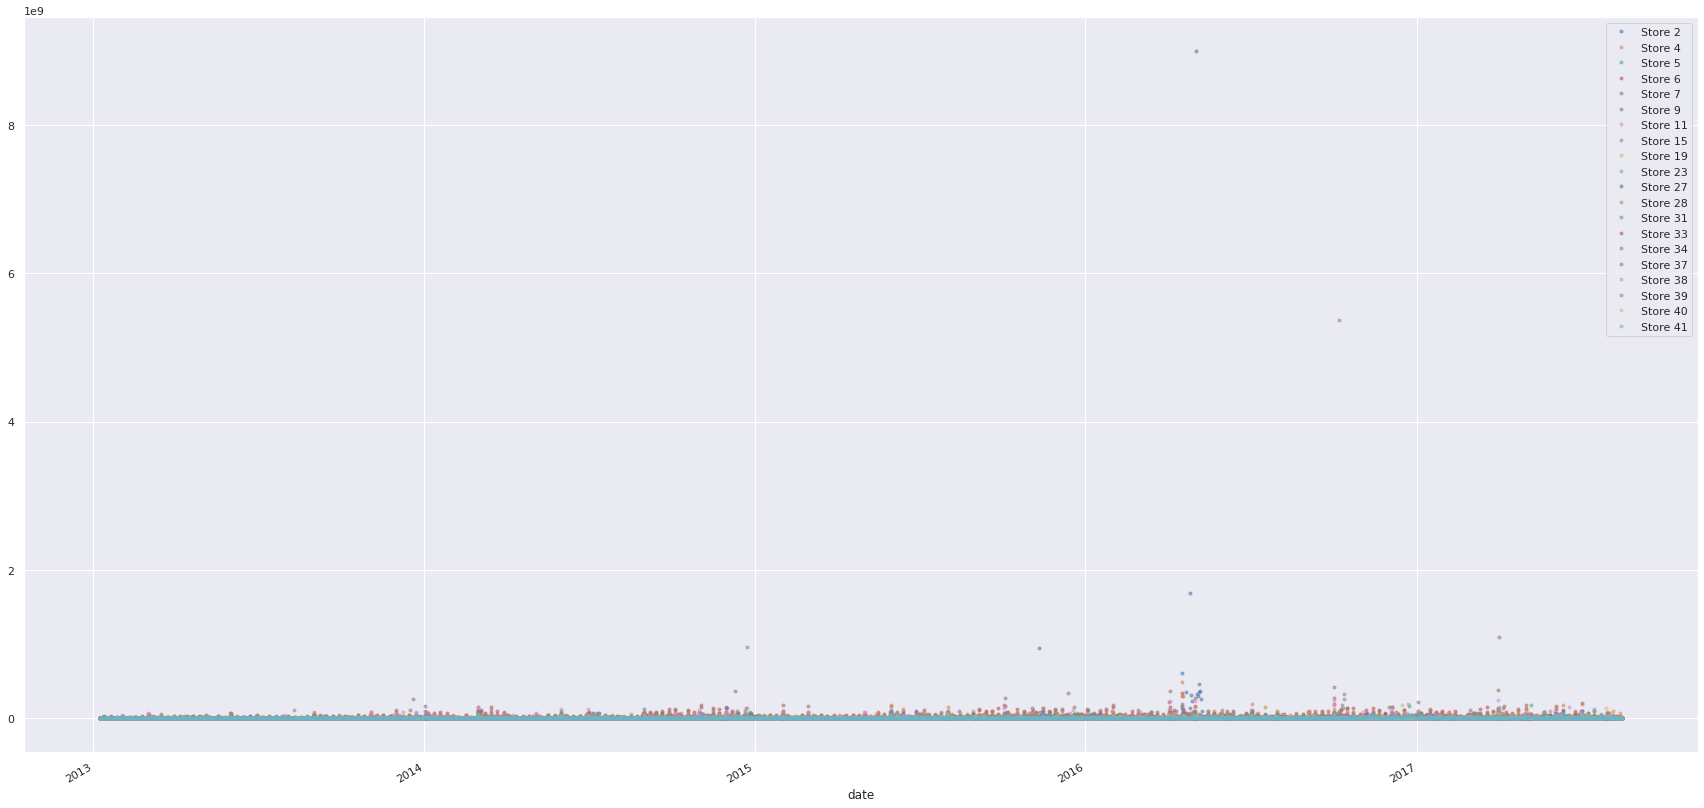

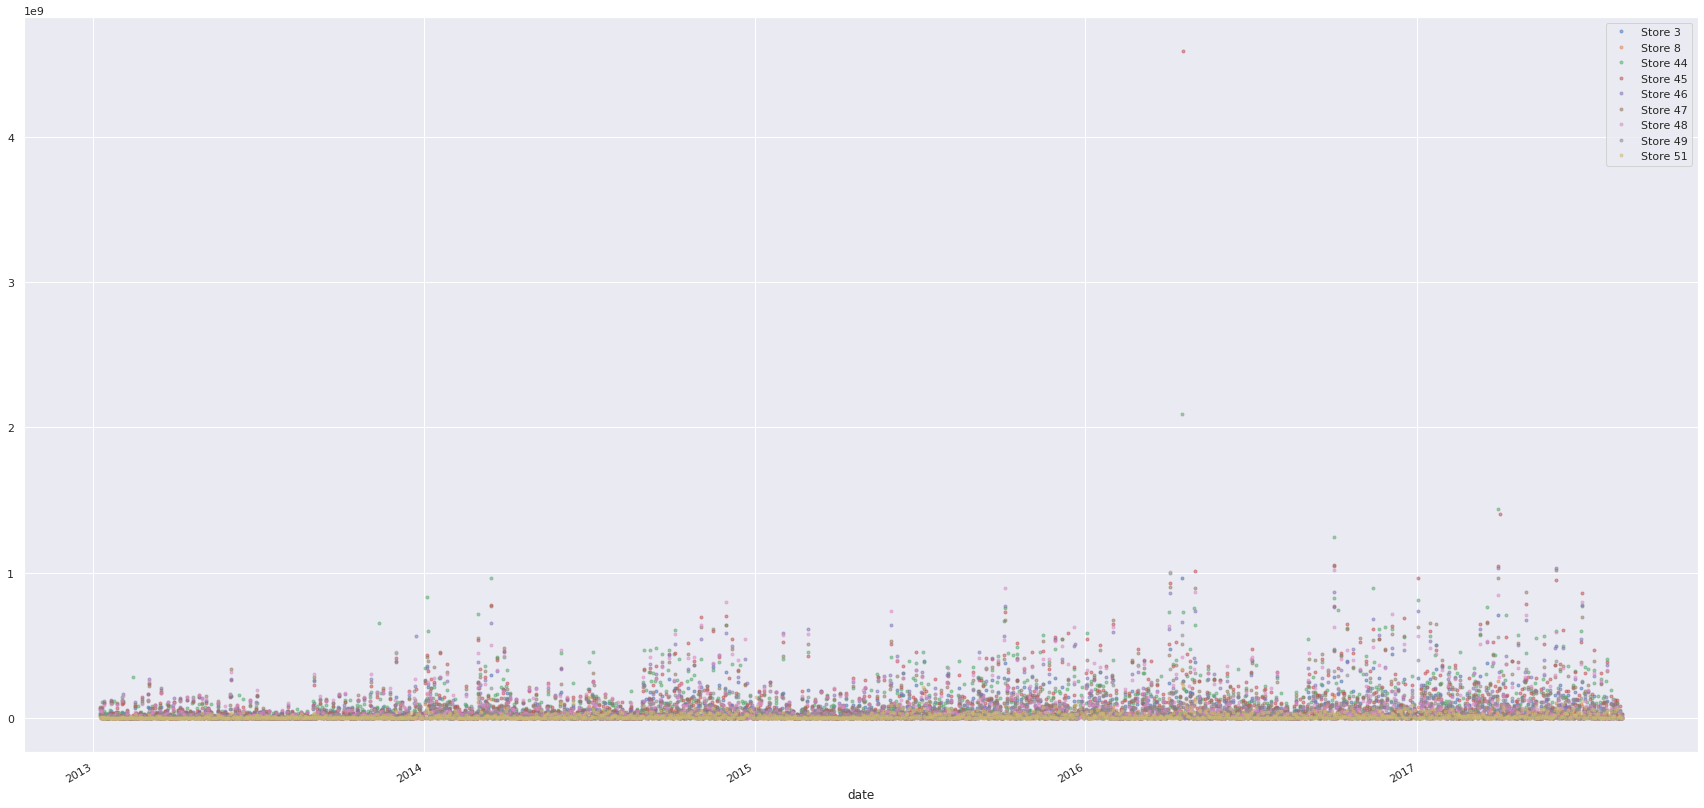

In [36]:
pow(pow((dfp_l-(dfp_l.rolling(7).mean())),2),0.5).plot(marker='.', alpha=0.5, linestyle='None')
pow((dfm_l-(dfm_l.rolling(7).mean())),2).plot(marker='.', alpha=0.5, linestyle='None')
pow((dfg_l-(dfg_l.rolling(7).mean())),2).plot(marker='.', alpha=0.5, linestyle='None')

In [37]:
df_agg = pd.DataFrame(columns=['Peq', 'Med', 'Gra'])
df_agg['Peq']=dfp_l.sum(axis=1)
df_agg['Med']=dfm_l.sum(axis=1)
df_agg['Gra']=dfg_l.sum(axis=1)
df_agg['Year'] = df_agg.index.year
df_agg['Month'] = df_agg.index.month

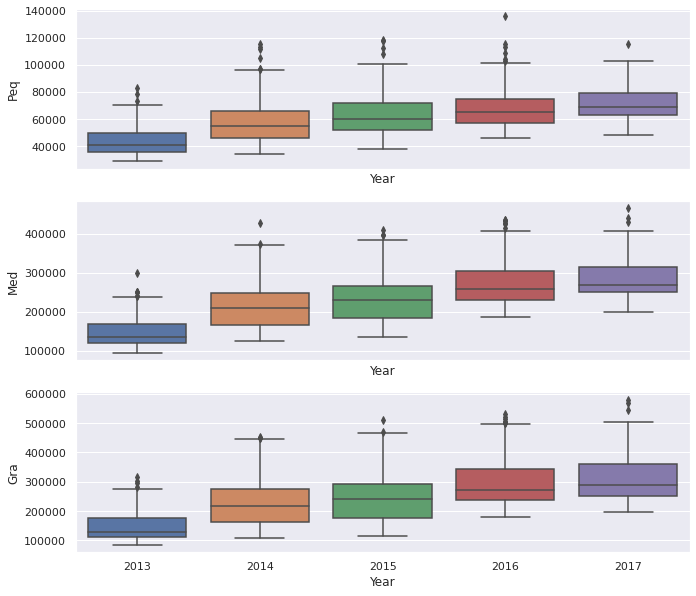

In [38]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Peq', 'Med', 'Gra'], axes):
  sns.boxplot(data=df_agg, x='Year', y=name, ax=ax)
  #ax.set_ylabel('GWh')
  #ax.set_title(name)

if ax != axes[-1]:
    ax.set_xlabel('')

Se puede ver claramente la tendencia creciente año a año.

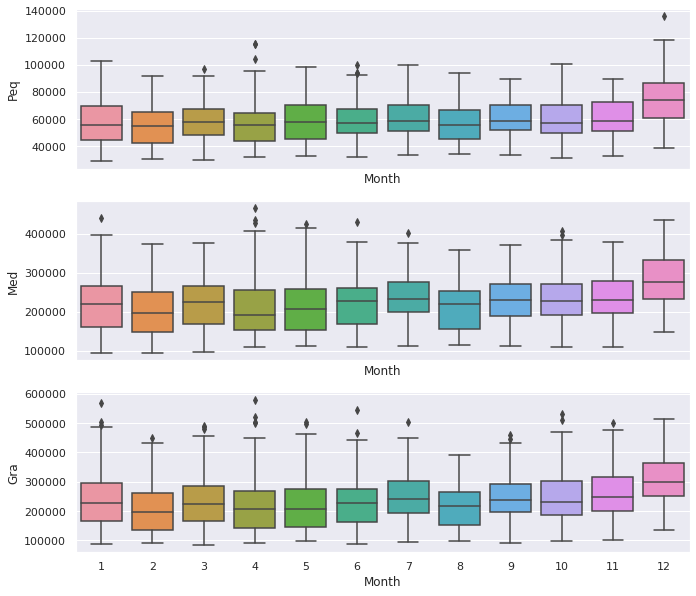

In [39]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Peq', 'Med', 'Gra'], axes):
  sns.boxplot(data=df_agg, x='Month', y=name, ax=ax)
  #ax.set_ylabel('GWh')
  #ax.set_title(name)

if ax != axes[-1]:
    ax.set_xlabel('')

En este caso si bien se observa en los boxplot el aumento de ventas de diciembre, no se puede extraer ningun resultado concluyente de la estacionalidad, posiblemente sea porque el efeto tendencia "ensucia' los datos agregados de forma mensual. 



In [40]:
df_agg

Peq            Med            Gra  Year  Month
date                                                               
2013-01-02  51989.452008  182463.670998  201956.274950  2013      1
2013-01-03  41772.226986  136913.254050  136698.509040  2013      1
2013-01-04  37845.008987  125783.588012  145317.511086  2013      1
2013-01-05  51491.293033  166736.067102  201121.510084  2013      1
2013-01-06  49614.040996  183870.774075  234524.196986  2013      1
...                  ...            ...            ...   ...    ...
2017-08-11  66098.422000  250163.872971  293153.899016  2017      8
2017-08-12  68750.079010  258211.576028  269326.525154  2017      8
2017-08-13  69850.048989  272041.623123  307877.529330  2017      8
2017-08-14  67894.057980  258858.269949  248707.277030  2017      8
2017-08-15  73433.074010  261323.600959  232894.666973  2017      8

[1679 rows x 5 columns]

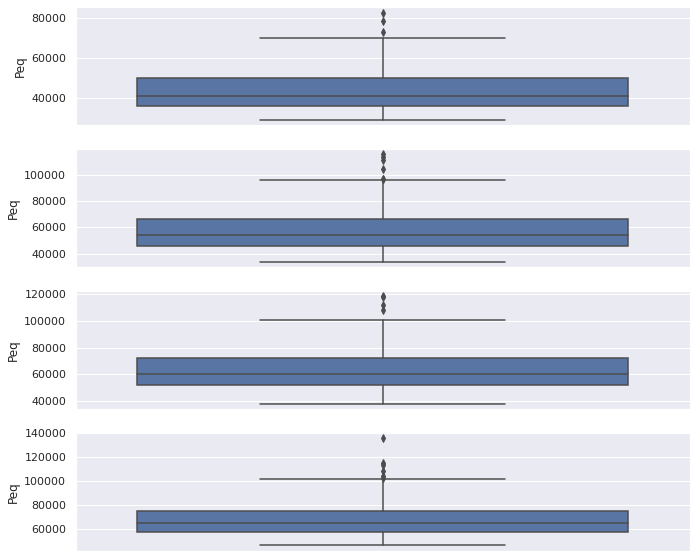

In [41]:
fig, axes = plt.subplots(4, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['2013', '2014', '2015', '2016'], axes):
  #sns.boxplot(data=df_agg['Peq'], y=name, ax=ax, x='Month')
  sns.boxplot(data=df_agg['Peq'], y=name, ax=ax)

if ax != axes[-1]:
    ax.set_xlabel('')



Graficos para a;os sin agregacion.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  Thi

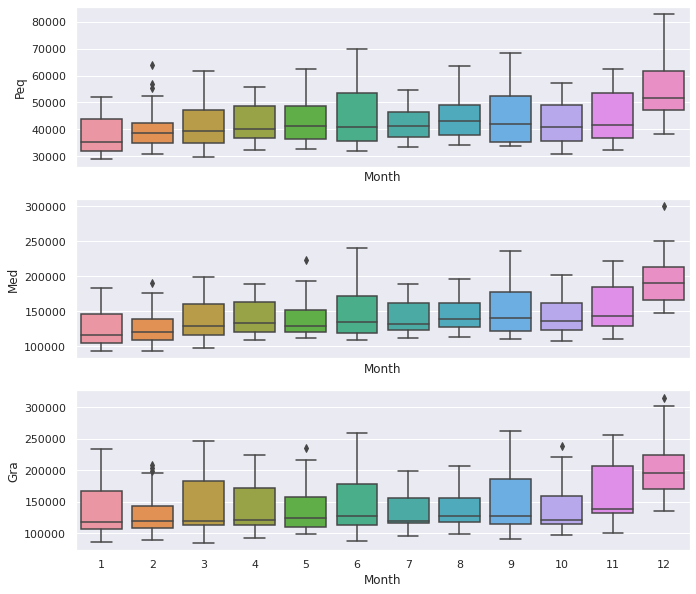

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Peq', 'Med', 'Gra'], axes):
  sns.boxplot(data=df_agg['2013'], x='Month', y=name, ax=ax)
  #ax.set_ylabel('GWh')
  #ax.set_title(name)

if ax != axes[-1]:
    ax.set_xlabel('')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  Thi

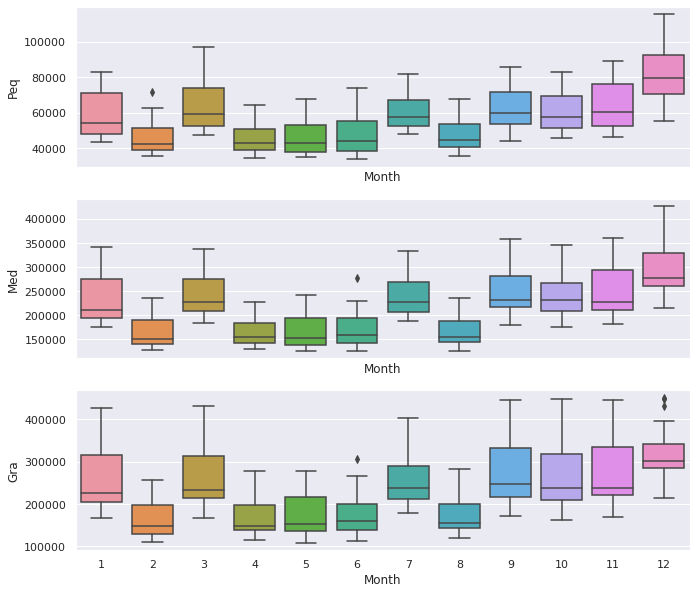

In [43]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Peq', 'Med', 'Gra'], axes):
  sns.boxplot(data=df_agg['2014'], x='Month', y=name, ax=ax)
  #ax.set_ylabel('GWh')
  #ax.set_title(name)

if ax != axes[-1]:
    ax.set_xlabel('')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  Thi

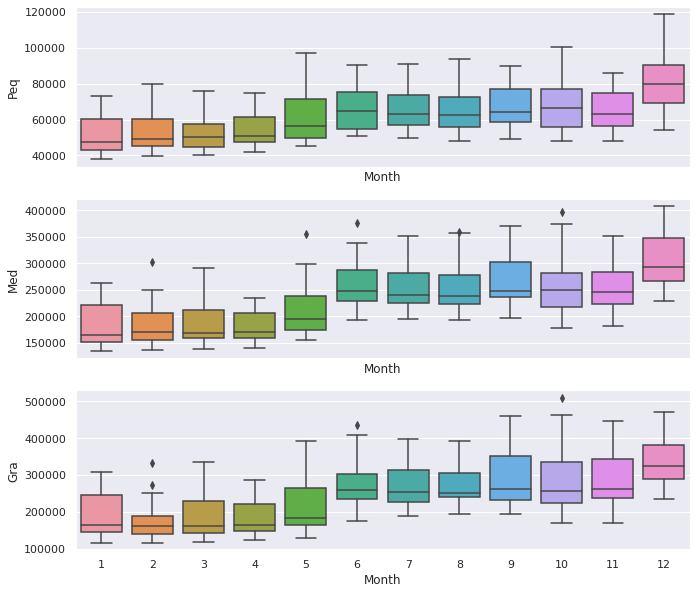

In [44]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Peq', 'Med', 'Gra'], axes):
  sns.boxplot(data=df_agg['2015'], x='Month', y=name, ax=ax)
  #ax.set_ylabel('GWh')
  #ax.set_title(name)

if ax != axes[-1]:
    ax.set_xlabel('')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  Thi

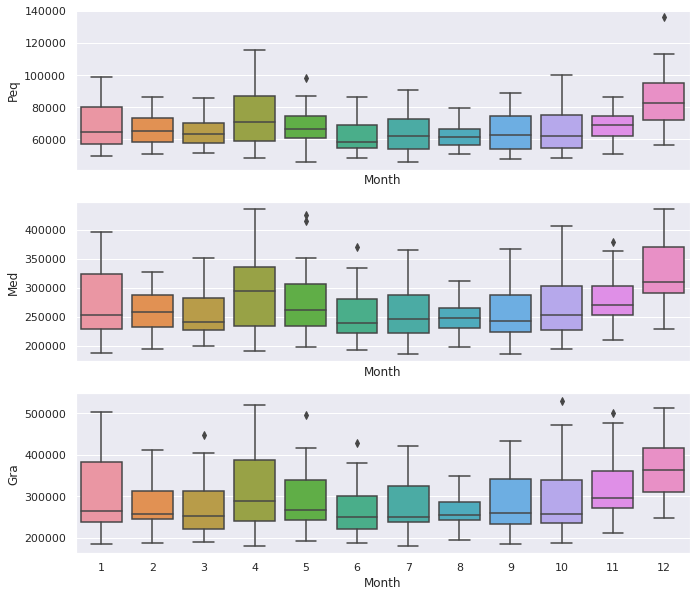

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Peq', 'Med', 'Gra'], axes):
  sns.boxplot(data=df_agg['2016'], x='Month', y=name, ax=ax)
  #ax.set_ylabel('GWh')
  #ax.set_title(name)

if ax != axes[-1]:
    ax.set_xlabel('')



Seleccionar una serie y confeccionar un diagrama de dispersión entre la misma y su valor retardado un período.



Repetir el mismo procedimiento entre la serie y sus valores retardados 2, 3 y 4 períodos.

Grafique e interprete las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El siguiente link puede ser útil para una primera aproximación.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


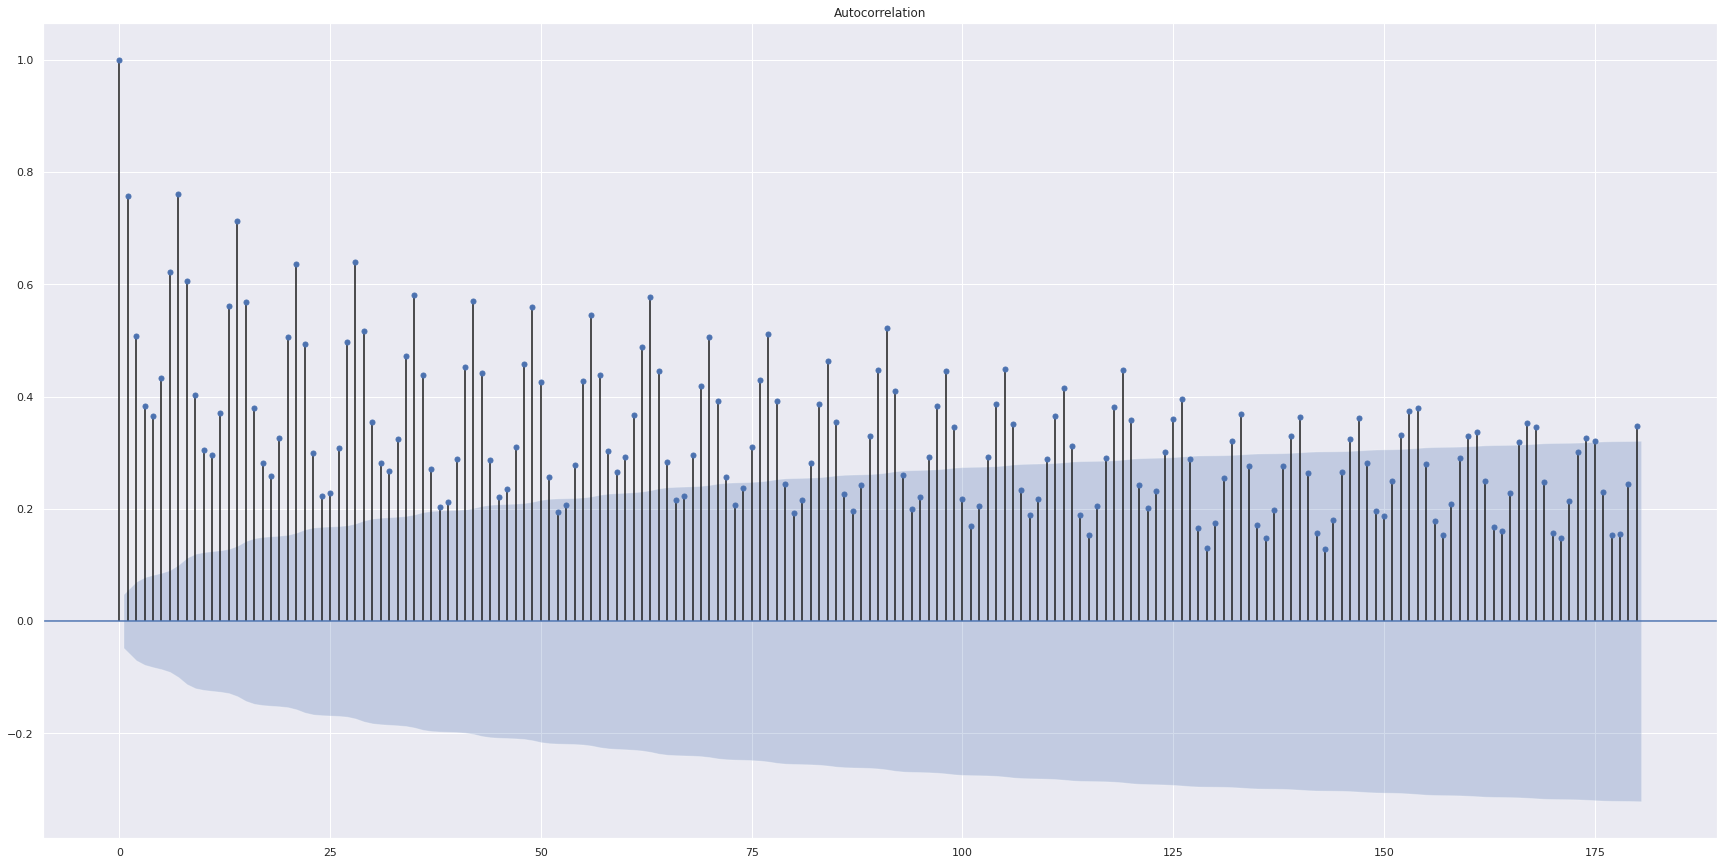

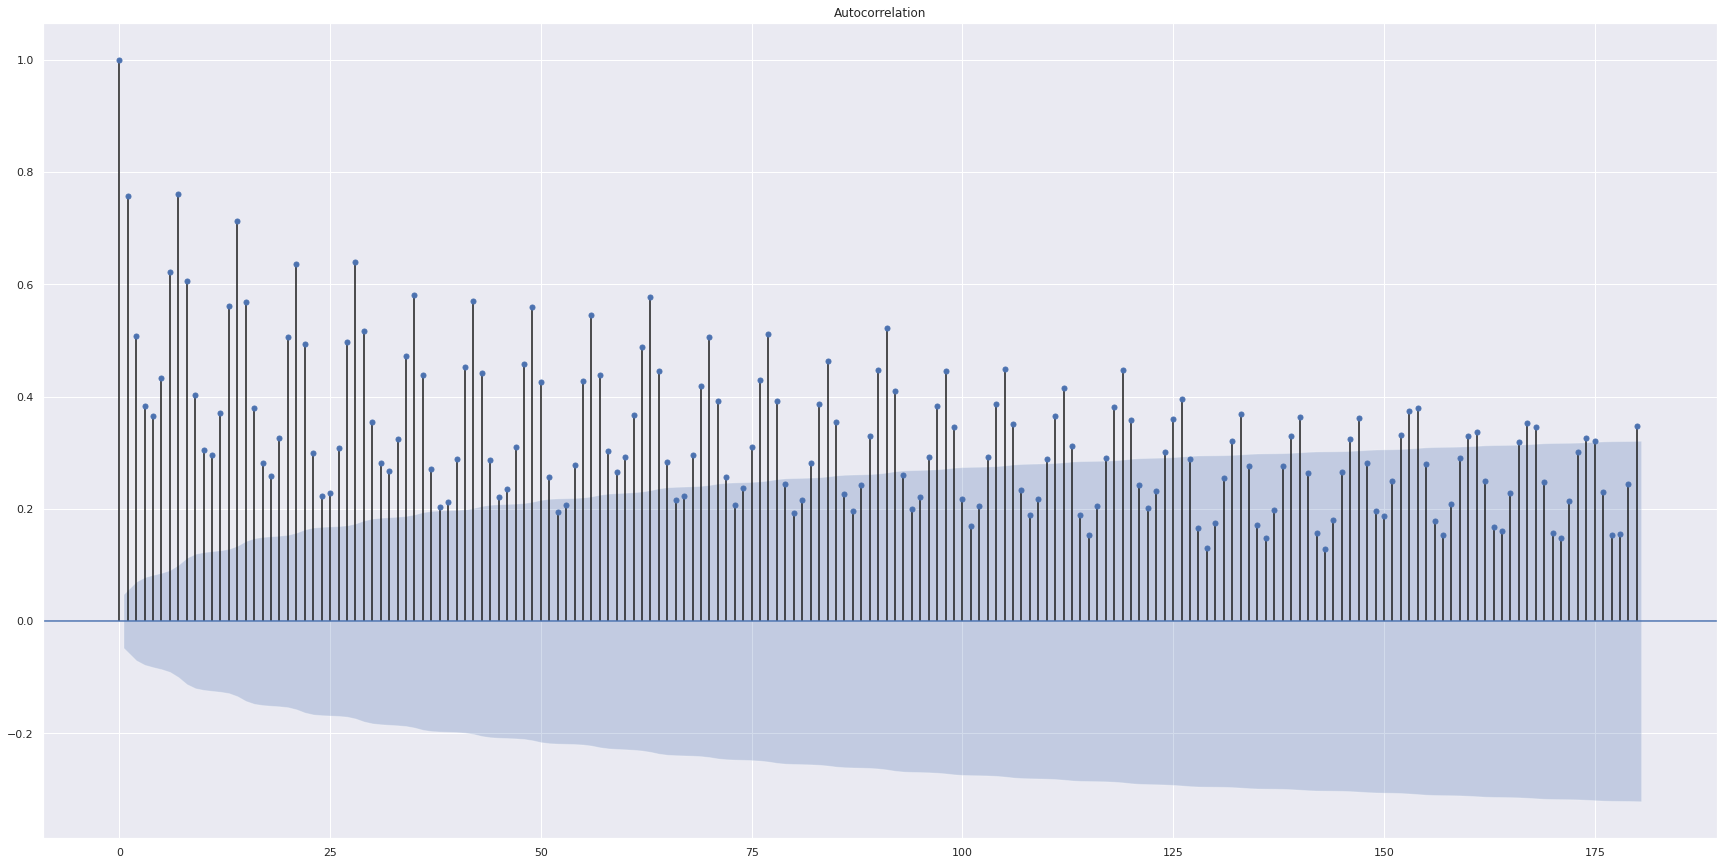

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x=df_agg['Peq'],lags=180)

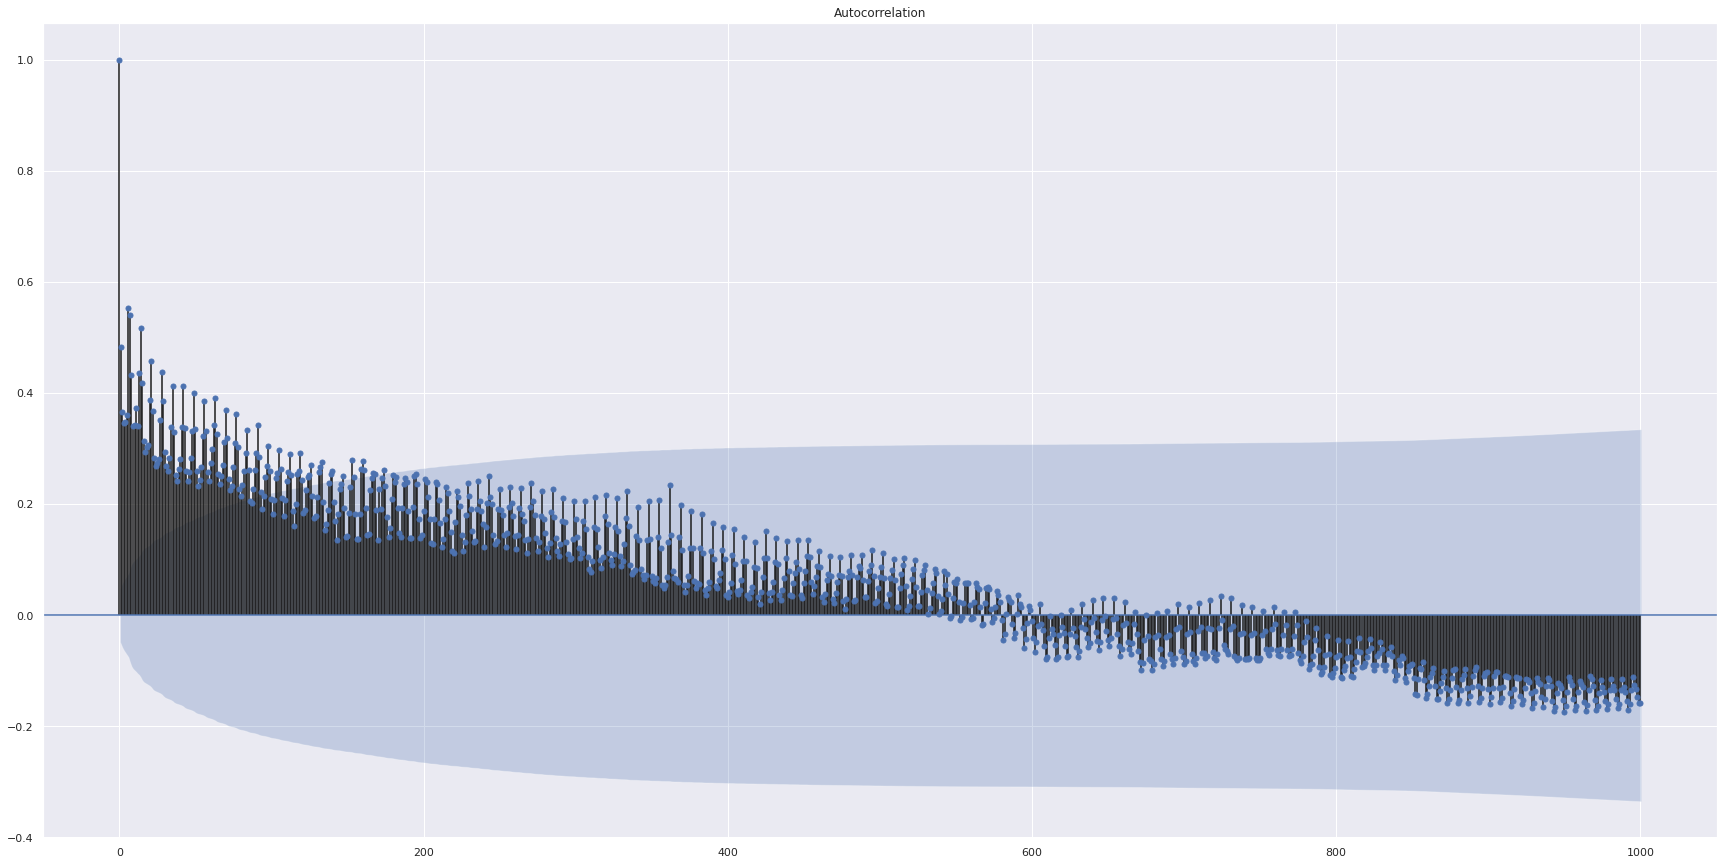

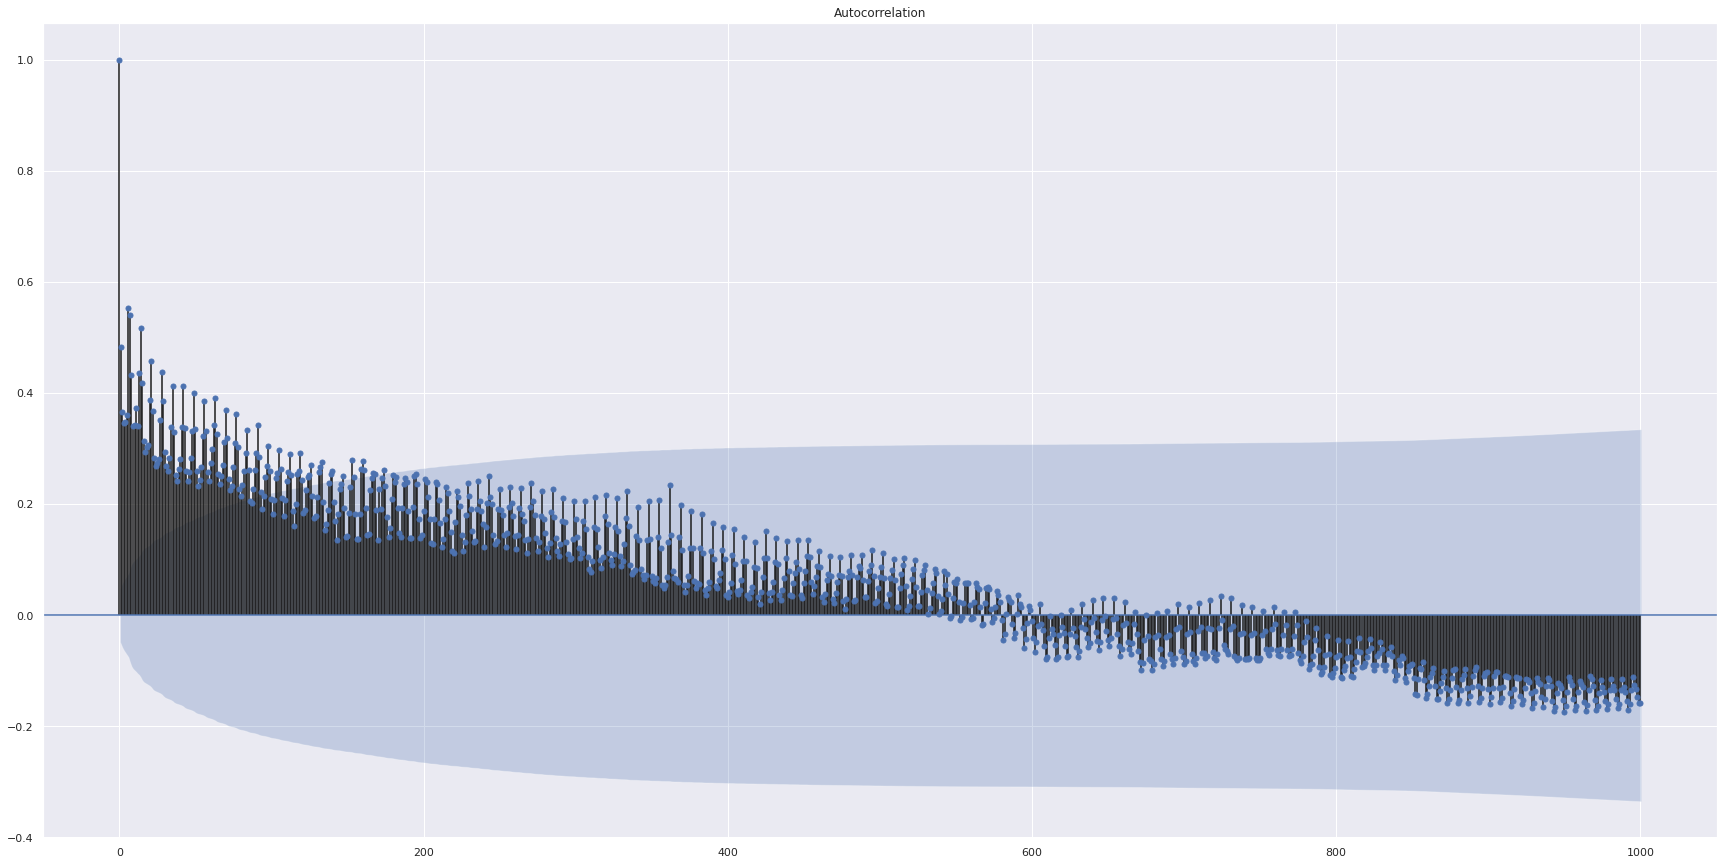

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x=df_limpio['Store 2'],lags=1000)

In [50]:
####REVISAR

#import statsmodels.api as sm

#dta = df_agg
#dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2013', '2016'))
#del dta["D"]
#sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40)
#plt.show()